**GRUPO 2**

> **Integrantes**:
>
> - Roberto Perez Esteban
> - Sofia Gomez Ramirez
> - Agustin Arganin Castillo

Proyecto de análisis exploratorio de datos de inmuebles

In [1]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns

pd.options.mode.copy_on_write = True

# Proyecto EDA
## Análisis de Viviendas

In [2]:
print(os.getcwd())

c:\Users\rober\OneDrive\Desktop\Master_TheBridge\EDA_Inmuebles_Idealista\src\notebooks


In [3]:
datasets = []
base_path = "../data"

### Cargar datos de múltiples datasets
#### 21-04-2023

Dentro de la carpeta encontramos archivos `.txt` y `.csv`.

In [4]:
path = f"{base_path}/23-04-21"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-04-21
['23-04-21 Descarga Idealista.txt', '23-04-21Datos2000(4).csv']


##### Archivo: **23-04-21 Descarga Idealista.txt**

Cargamos el dataset.

In [5]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-04-21/23-04-21 Descarga Idealista.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
514,99851911,https://img3.idealista.com/blur/WEB_LISTING/0/...,AS 180734,88,2,1290000.0,flat,sale,196.0,True,...,"{'subtitle': 'Sol, Madrid', 'title': 'Piso en ...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1143,100795009,https://img3.idealista.com/blur/WEB_LISTING/0/...,375000,25,3,375000.0,flat,sale,73.0,True,...,"{'subtitle': 'Niño Jesús, Madrid', 'title': 'P...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
381,101166298,https://img3.idealista.com/blur/WEB_LISTING/0/...,Paul,15,bj,269000.0,duplex,sale,85.0,True,...,"{'subtitle': 'Moscardó, Madrid', 'title': 'Dúp...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
603,98610330,https://img3.idealista.com/blur/WEB_LISTING/0/...,SM172548,36,5,799000.0,flat,sale,200.0,True,...,"{'subtitle': 'Nueva España, Madrid', 'title': ...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
967,100920523,https://img3.idealista.com/blur/WEB_LISTING/0/...,W-02RI9O,27,7,495000.0,flat,sale,95.0,True,...,"{'subtitle': 'Pacífico, Madrid', 'title': 'Piso'}",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


Análizamos brevemente lo que posee, pero antes desarrollamos una función que nos ayude a agilizar el proceso.

In [6]:
def basic_dataset_info(dataset):
	rows = len(dataset)
	cols = len(dataset.columns)

	print(f"Información de dataset: {rows} registros, {cols} columnas")
	print("Revisión de columnas del dataset:")
	print("="*60)

	columns = dataset.columns
	for column in columns:
		print(f"\t-{column} ({dataset[column].dtype}):")

		nulos = dataset[column].isna().sum()
		print(f"\t\t-Registros nulos: {nulos} ({nulos/rows * 100:.3f}%)")

		cardinality = len(dataset[column].value_counts())/rows
		print(f"\t\t-Cardinalidad: {cardinality * 100:.3f}%")

Desarrollamos una función para extraer información básica del dataset.

In [7]:
basic_dataset_info(data)

Información de dataset: 1192 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 89.346%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.591%
	-externalReference (object):
		-Registros nulos: 65 (5.453%)
		-Cardinalidad: 83.305%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 6.963%
	-floor (object):
		-Registros nulos: 134 (11.242%)
		-Cardinalidad: 1.678%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.171%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.594%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.839%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinali

In [8]:
datasets.append(data)

##### Archivo: **23-04-21Datos2000(4).csv**

In [9]:
dir = f"{path}/{files[0]}"
#dir = f"{base_path}/23-04-21/{files[1]}"
print("Directory:", dir)
pd.read_csv(dir)

Directory: ../data/23-04-21/23-04-21 Descarga Idealista.txt


,"[{""propertyCode"": ""97392656""","""thumbnail"": ""https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/81/1e/a9/993794514.jpg""","""externalReference"": ""MIV01885""","""numPhotos"": 36","""floor"": ""4""","""price"": 479000.0","""propertyType"": ""flat""","""operation"": ""sale""","""size"": 84.0","""exterior"": true",...,"""suggestedTexts"": {""subtitle"": ""San Diego.34","Madrid"".1191","""title"": ""Piso en Calle Blanca Luna""}","""hasPlan"": false.189","""has3DTour"": false.746","""has360"": false.871","""hasStaging"": false.1072","""highlight"": {""groupDescription"": ""Destacado""}.260","""superTopHighlight"": false.599","""topNewDevelopment"": false}]"


Cómo vemos, este archivo posee información que no vamos a poder asociar a ningún inmueble.

#### 20-05-2023

Dentro de la carpeta encontramos una variedad de archivos: `.txt`, `.csv` , `.xlsx`.

In [10]:
path = f"{base_path}/23-05-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-05-20
['DatosDescarga.csv', 'DatosDescarga2(1) - nuda.csv', 'DatosDescarga2(1).csv', 'Listado.txt', 'Verificaciones.xlsx', 'Verificación 2.csv']


##### Archivo: **DatosDescarga2(1).csv**

In [11]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
725,725,101461685,740000.0,flat,sale,167.0,True,3,3,Calle de Atocha,...,False,4431.0,{'typology': 'flat'},"{'subtitle': 'Huertas-Cortes, Madrid', 'title'...",True,False,False,3,True,NaN
484,484,101001137,1160000.0,penthouse,sale,87.0,True,2,2,barrio Almagro,...,False,13333.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Almagro, Madrid', 'title': 'Ático'}",True,False,False,7,True,NaN
17,17,99534513,210000.0,flat,sale,62.0,True,2,1,"Calle de Sarria, 45",...,False,3387.0,{'typology': 'flat'},"{'subtitle': 'Pilar, Madrid', 'title': 'Piso e...",True,False,False,en,True,NaN
752,752,101397010,498000.0,flat,sale,110.0,True,2,1,barrio Pacífico,...,False,4527.0,{'typology': 'flat'},"{'subtitle': 'Pacífico, Madrid', 'title': 'Piso'}",True,False,False,1,True,NaN
212,212,100948580,199000.0,flat,sale,55.0,True,3,1,Calle Francisca Calonge,...,False,3618.0,{'typology': 'flat'},"{'subtitle': 'Valdeacederas, Madrid', 'title':...",False,False,False,4,False,NaN


In [12]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 31 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [13]:
datasets.append(data)

##### Archivo: **Listado.txt**

In [14]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-05-20/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,labels,newDevelopmentFinished
916,101254070,https://img3.idealista.com/blur/WEB_LISTING/0/...,llx,20,3,1150000.0,flat,sale,158.0,True,...,"{'subtitle': 'Ibiza, Madrid', 'title': 'Piso e...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
635,100161901,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,32,9,950000.0,flat,sale,160.0,True,...,"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
433,101309492,https://img3.idealista.com/blur/WEB_LISTING/0/...,HG185800,46,NaN,575000.0,chalet,sale,175.0,False,...,"{'subtitle': 'Valdeacederas, Madrid', 'title':...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
352,100950440,https://img3.idealista.com/blur/WEB_LISTING/0/...,Arganzuela,30,1,257000.0,flat,sale,42.0,False,...,"{'subtitle': 'Acacias, Madrid', 'title': 'Piso...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
169,101079057,https://img3.idealista.com/blur/WEB_LISTING/0/...,Calle Toledo,46,1,380000.0,flat,sale,78.0,True,...,"{'subtitle': 'Imperial, Madrid', 'title': 'Pis...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


In [15]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 87.542%
	-externalReference (object):
		-Registros nulos: 68 (5.686%)
		-Cardinalidad: 81.773%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.274%
	-floor (object):
		-Registros nulos: 117 (9.783%)
		-Cardinalidad: 1.672%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [16]:
datasets.append(data)

##### Archivo: **Verificaciones.xlsx**

In [17]:
dir = f"{path}/{files[4]}"
print("Directory:", dir)

data = pd.read_excel(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificaciones.xlsx


,Unnamed: 0,Unnamed: 1
1333,101577779,1
807,100965538,1
709,100797670,2
1227,101469114,1
818,100982920,2


##### Archivo: **DatosDescarga.csv**

In [18]:
dir = f"{path}/{files[5]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificación 2.csv


,ex,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,n�mero de veces
2322,1044.0,103523437.0,760000.0,flat,sale,134.0,True,3.0,2.0,Calle de Víctor de la Serna,...,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Víctor de la Serna,"Bernabéu-Hispanoamérica, Madrid",True,True,2.0
2168,159.0,103353383.0,335000.0,penthouse,sale,93.0,True,4.0,1.0,Calle Baleares,...,7,True,NaN,flat,penthouse,Ático en Calle Baleares,"Comillas, Madrid",NaN,NaN,2.0
742,291.0,100531794.0,690000.0,flat,sale,130.0,True,4.0,2.0,Calle de Monteleón,...,1,True,NaN,flat,NaN,Piso en Calle de Monteleón,"Malasaña-Universidad, Madrid",NaN,NaN,1.0
2360,564.0,103580633.0,570000.0,flat,sale,115.0,True,4.0,2.0,ferrocarril,...,4,True,NaN,flat,NaN,Piso en ferrocarril,"Delicias, Madrid",NaN,NaN,1.0
216,1020.0,98184516.0,1495000.0,flat,sale,320.0,True,5.0,4.0,barrio Colina,...,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Colina, Madrid",True,True,1.0


In [19]:
basic_dataset_info(data)

Información de dataset: 2395 registros, 37 columnas
Revisión de columnas del dataset:
	-ex (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 50.021%
	-propertyCode (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 83.257%
	-price (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 27.641%
	-propertyType (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.209%
	-operation (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-size (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 14.990%
	-exterior (object):
		-Registros nulos: 66 (2.756%)
		-Cardinalidad: 0.084%
	-rooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.459%
	-bathrooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.376%
	-address (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 39.499%
	-province (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-municipality (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 

In [20]:
datasets.append(data)

##### Archivo: **Verificación 2.csv**

In [21]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1).csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
455,455,98000883,1250000.0,flat,sale,380.0,True,3,4,barrio Cuzco-Castillejos,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Cuzco-Castillejos, Madrid",True,True
471,471,100412762,675000.0,flat,sale,125.0,True,3,2,"Calle de Maudes, 60",...,False,1,True,NaN,flat,NaN,"Piso en Calle de Maudes, 60","Nuevos Ministerios-Ríos Rosas, Madrid",NaN,NaN
67,67,100890365,700000.0,flat,sale,143.0,True,4,3,Avenida de la Reina Victoria,...,False,3,True,NaN,flat,NaN,Piso en Avenida de la Reina Victoria,"Ciudad Universitaria, Madrid",NaN,NaN
46,46,98550922,290000.0,flat,sale,84.0,True,2,1,"Numancia, 21",...,False,bj,True,NaN,flat,NaN,"Piso en Numancia, 21","Bellas Vistas, Madrid",NaN,NaN
876,876,100826383,1170000.0,flat,sale,186.0,True,5,2,Calle del Conde de Peñalver,...,False,2,True,NaN,flat,NaN,Piso en Calle del Conde de Peñalver,"Lista, Madrid",NaN,NaN


In [22]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [23]:
datasets.append(data)

##### Archivo: **DatosDescarga2(1) - nuda.csv**

In [24]:
dir = f"{path}/{files[5]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificación 2.csv


,ex,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,n�mero de veces
1104,1176.0,101129096.0,407000.0,duplex,sale,190.0,True,4.0,2.0,barrio San Diego,...,4,True,NaN,flat,duplex,Dúplex,"San Diego, Madrid",NaN,NaN,1.0
1404,193.0,101447567.0,175000.0,flat,sale,52.0,True,2.0,1.0,Calle Hermanos del Moral,...,2,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle Hermanos del Moral,"Opañel, Madrid",True,True,1.0
684,708.0,100412269.0,1400000.0,flat,sale,195.0,False,2.0,2.0,Calle de Velázquez,...,2,True,NaN,flat,NaN,Piso en Calle de Velázquez,"Recoletos, Madrid",NaN,NaN,1.0
1656,887.0,102347197.0,698000.0,flat,sale,108.0,False,2.0,2.0,Calle de Maldonado,...,6,True,NaN,flat,NaN,Piso en Calle de Maldonado,"Lista, Madrid",NaN,NaN,1.0
2309,741.0,103509620.0,395000.0,duplex,sale,100.0,True,2.0,1.0,Calle de Canarias,...,bj,False,NaN,flat,duplex,Dúplex en Calle de Canarias,"Palos de Moguer, Madrid",NaN,NaN,2.0


In [25]:
basic_dataset_info(data)

Información de dataset: 2395 registros, 37 columnas
Revisión de columnas del dataset:
	-ex (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 50.021%
	-propertyCode (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 83.257%
	-price (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 27.641%
	-propertyType (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.209%
	-operation (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-size (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 14.990%
	-exterior (object):
		-Registros nulos: 66 (2.756%)
		-Cardinalidad: 0.084%
	-rooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.459%
	-bathrooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.376%
	-address (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 39.499%
	-province (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-municipality (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 

		-Cardinalidad: 82.839%
	-status (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.125%
	-newDevelopment.1 (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.084%
	-priceByArea (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 64.175%
	-detailedType (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.334%
	-suggestedTexts (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 48.017%
	-hasPlan (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.084%
	-topNewDevelopment (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-floor (object):
		-Registros nulos: 216 (9.019%)
		-Cardinalidad: 0.877%
	-hasLift (object):
		-Registros nulos: 100 (4.175%)
		-Cardinalidad: 0.084%
	-parkingSpace (object):
		-Registros nulos: 1530 (63.883%)
		-Cardinalidad: 1.002%
	-dType (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.084%
	-SubdType (object):
		-Registros nulos: 2027 (84.635%)
		-Cardinalidad: 0.251%
	-dsugTextTit (object):


In [26]:
datasets.append(data)

#### 19-06-2023

In [27]:
path = f"{base_path}/23-06-19"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-06-19
['DatosDescarga.csv', 'DatosDescarga2 - nuda.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **Listado.txt**

In [28]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-06-19/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
402,99644005,https://img3.idealista.com/blur/WEB_LISTING/0/...,RF167445,42,9,480000.0,flat,sale,170.0,True,...,"{'subtitle': 'La Paz, Madrid', 'title': 'Piso ...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
874,100826383,https://img3.idealista.com/blur/WEB_LISTING/0/...,BS184047,41,2,1100000.0,flat,sale,186.0,True,...,"{'subtitle': 'Lista, Madrid', 'title': 'Piso e...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
956,98750844,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/2370,33,1,395000.0,flat,sale,81.0,True,...,"{'subtitle': 'Pacífico, Madrid', 'title': 'Pis...",True,False,False,True,{'groupDescription': 'Top'},False,False,"[{'name': 'fullFinancing', 'text': '100% Finan...",NaN
157,101687771,https://img3.idealista.com/blur/WEB_LISTING/0/...,RM-1952,27,1,365000.0,flat,sale,125.0,True,...,"{'subtitle': 'San Isidro, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
170,101759700,https://img3.idealista.com/blur/WEB_LISTING/0/...,RP1052023115444,27,2,250000.0,flat,sale,64.0,False,...,"{'subtitle': 'Imperial, Madrid', 'title': 'Pis...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


In [29]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-thumbnail (object):
		-Registros nulos: 1 (0.084%)
		-Cardinalidad: 87.856%
	-externalReference (object):
		-Registros nulos: 74 (6.198%)
		-Cardinalidad: 82.412%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.370%
	-floor (object):
		-Registros nulos: 111 (9.296%)
		-Cardinalidad: 1.759%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [30]:
datasets.append(data)

##### Archivo: **DatosDescarga.csv**

In [31]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2 - nuda.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,Nuda
877,877.0,99113785.0,2100000.0,flat,sale,236.0,True,5.0,3.0,Calle de Diego de León,...,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Diego de León,"Castellana, Madrid",True,True,0.0
979,979.0,101145386.0,105000.0,flat,sale,56.0,False,3.0,1.0,Calle del Puerto de Almansa,...,4,False,NaN,flat,NaN,Piso en Calle del Puerto de Almansa,"San Diego, Madrid",NaN,NaN,0.0
1177,1177.0,100668687.0,180000.0,flat,sale,103.0,True,2.0,1.0,Calle San Moisés,...,1,False,NaN,flat,NaN,Piso en Calle San Moisés,"San Diego, Madrid",NaN,NaN,0.0
1059,1059.0,100779760.0,910000.0,flat,sale,111.0,True,3.0,2.0,Calle del Corazón de María s/n,...,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Corazón de María s/n,"Prosperidad, Madrid",True,True,0.0
331,331.0,89977868.0,695000.0,flat,sale,131.0,True,4.0,2.0,barrio Sol,...,4,True,NaN,flat,NaN,Piso,"Sol, Madrid",NaN,NaN,0.0


In [32]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 38 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 99.833%
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.378%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 26.171%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.836%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 47.826%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardina

In [33]:
datasets.append(data)

##### Archivo: **DatosDescarga2 - nuda.csv**

In [34]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
776,776,99288943,520000.0,flat,sale,135.0,True,3,1,barrio Legazpi,...,False,6,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Legazpi, Madrid",True,True
827,827,97497393,2490000.0,duplex,sale,358.0,False,4,4,barrio Nueva España,...,False,1,True,NaN,flat,duplex,Dúplex,"Nueva España, Madrid",NaN,NaN
148,148,99621620,439900.0,flat,sale,111.0,True,3,2,Calle de Paradinas,...,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Paradinas,"Imperial, Madrid",True,False
526,526,101184937,790000.0,flat,sale,110.0,True,1,2,barrio Chueca-Justicia,...,False,4,True,NaN,flat,NaN,Piso,"Chueca-Justicia, Madrid",NaN,NaN
565,565,100366657,399000.0,flat,sale,71.0,True,2,2,"Calle de Torres Miranda, 20",...,False,7,True,NaN,flat,NaN,"Piso en Calle de Torres Miranda, 20","Chopera, Madrid",NaN,NaN


In [35]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [36]:
datasets.append(data)

##### Archivo: **DatosDescarga2.csv**

In [37]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2 - nuda.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,Nuda
832,832.0,99929134.0,3600000.0,chalet,sale,376.0,False,5.0,6.0,barrio Nueva España,...,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,independantHouse,Casa independiente,"Nueva España, Madrid",True,True,0.0
273,273.0,101707111.0,499000.0,flat,sale,104.0,True,3.0,2.0,barrio Vallehermoso,...,2,True,NaN,flat,NaN,Piso,"Vallehermoso, Madrid",NaN,NaN,0.0
527,527.0,100243824.0,2600000.0,flat,sale,382.0,True,3.0,3.0,barrio Chueca-Justicia,...,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Chueca-Justicia, Madrid",True,True,0.0
734,734.0,100443748.0,455000.0,flat,sale,105.0,True,3.0,2.0,barrio Pacífico,...,2,True,NaN,flat,NaN,Piso,"Pacífico, Madrid",NaN,NaN,0.0
415,415.0,100028643.0,1380000.0,flat,sale,261.0,True,4.0,5.0,Calle de Orense,...,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Orense,"Cuzco-Castillejos, Madrid",True,True,0.0


In [38]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 38 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 99.833%
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.378%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 26.171%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.836%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 47.826%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardina

In [39]:
datasets.append(data)

#### 1) Union `21-04-2023 - 19-06-2023`
Concatenamos los todos los dataset que hemos ido guardando en `dataframes`.

In [40]:
df_union_1 = pd.concat(datasets, ignore_index=True)
df_union_1.sample(2)

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,newDevelopment.1,ex,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,n�mero de veces,Nuda
2799,101198008,https://img3.idealista.com/blur/WEB_LISTING/0/...,MD1A1V196,35.0,2,159900.0,studio,sale,41.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,100598415,https://img3.idealista.com/blur/WEB_LISTING/0/...,3248-22434,49.0,7,480000.0,flat,sale,116.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 29-10-2029

In [41]:
path = f"{base_path}/23-10-29"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-10-29
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **DatosDescarga.csv**

In [42]:
df_2023_10_29 = pd.read_csv(f"{path}/DatosDescarga.csv") 
df_2023_10_29

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,...,False,3592.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,1,True,NaN
2,2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",...,False,5000.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,...,False,3351.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1429.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN
1194,1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN
1196,1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1340.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [43]:
df_2023_10_29_2 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2023_10_29_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,...,False,1,True,NaN,flat,NaN,Piso en Calle Valdesangil,"Valdezarza, Madrid",NaN,NaN
2,2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",...,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,"Piso en Calle Isla Malaita, 7","Peñagrande, Madrid",True,True
3,3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
4,4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,independantHouse,Casa independiente en Calle de San Gerardo,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1194,1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [44]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_10_29 = pd.DataFrame(data)
df_listado_23_10_29

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,newDevelopmentFinished,labels
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,102714810,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,52,1,370000.0,flat,sale,103.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,102015772,https://img3.idealista.com/blur/WEB_LISTING/0/...,PV:1027,32,10,385000.0,flat,sale,77.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,102643242,https://img3.idealista.com/blur/WEB_LISTING/0/...,INM14861,64,NaN,1300000.0,chalet,sale,388.0,NaN,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,101654615,https://img3.idealista.com/blur/WEB_LISTING/0/...,28-01485,33,bj,199999.0,flat,sale,140.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,102963285,https://img3.idealista.com/blur/WEB_LISTING/0/...,503-ACC,42,bj,205000.0,flat,sale,153.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'reformed', 'text': 'Reformado'}]"


#### 2) Union 29-10-2023

In [45]:
data = [df_2023_10_29, df_2023_10_29_2, df_listado_23_10_29]
df_union_2 = pd.concat(data, ignore_index=True)
df_union_2.sample(5)

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,numPhotos,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,newDevelopmentFinished,labels
3321,NaN,101215323,1050000.0,flat,sale,151.0,True,3,2,barrio Goya,...,39.0,Goya,423,True,True,False,True,{'groupDescription': 'Top'},NaN,NaN
1365,167.0,102737331,272990.0,flat,sale,97.0,False,4,1,Calle de Jacinto Verdaguer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,472.0,101556702,740000.0,flat,sale,145.0,True,5,5,Calle de maudes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,367.0,102774566,257000.0,flat,sale,71.0,True,3,1,Paseo de Santa María de la Cabeza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1508,310.0,83544841,980000.0,flat,sale,152.0,True,2,1,barrio Palacio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 01-12-2023

In [46]:
path = f"{base_path}/23-12-1"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-12-1
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **DatosDescarga.csv**

In [47]:
df_2023_12_1 = pd.read_csv(f"{path}/DatosDescarga.csv") #Mediante la función de pandas read_csv vamos a listar todos los archivos que tengamos de este tipo.
df_2023_12_1

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,4660.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,...,False,5388.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,...,False,2273.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,2,True,NaN
1195,1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1307.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,bj,False,NaN
1196,1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1197,1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN


In [48]:
df_2023_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1199 non-null   int64  
 1   propertyCode       1199 non-null   int64  
 2   price              1199 non-null   float64
 3   propertyType       1199 non-null   object 
 4   operation          1199 non-null   object 
 5   size               1199 non-null   float64
 6   exterior           1126 non-null   object 
 7   rooms              1199 non-null   int64  
 8   bathrooms          1199 non-null   int64  
 9   address            1199 non-null   object 
 10  province           1199 non-null   object 
 11  municipality       1199 non-null   object 
 12  district           1199 non-null   object 
 13  country            1199 non-null   object 
 14  newDevelopment     1199 non-null   bool   
 15  latitude           1199 non-null   float64
 16  longitude          1199 

##### Archivo: **DatosDescarga2.csv**

In [49]:
df_2023_12_1_2= pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2023_12_1_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
3,3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,...,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
4,4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,...,False,2,True,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"San Diego, Madrid",NaN,NaN
1195,1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1196,1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1197,1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN


In [50]:
df_2023_12_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1199 non-null   int64  
 1   propertyCode       1199 non-null   int64  
 2   price              1199 non-null   float64
 3   propertyType       1199 non-null   object 
 4   operation          1199 non-null   object 
 5   size               1199 non-null   float64
 6   exterior           1126 non-null   object 
 7   rooms              1199 non-null   int64  
 8   bathrooms          1199 non-null   int64  
 9   address            1199 non-null   object 
 10  province           1199 non-null   object 
 11  municipality       1199 non-null   object 
 12  district           1199 non-null   object 
 13  country            1199 non-null   object 
 14  newDevelopment     1199 non-null   bool   
 15  latitude           1199 non-null   float64
 16  longitude          1199 

In [51]:
df_2023_12_1_2.columns
# 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit','dhasParking', 'dParkingIncl' 
#En el segundo arvhivo csv se puede observar que hay nuevas columnas, tendremos que ver si las dejamos o eliminamos.

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl'],
      dtype='object')

##### Archivo: **Listado.txt**

In [52]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_12_1 = pd.DataFrame(data)
df_listado_23_12_1

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,True,True,False,True,{'groupDescription': 'Top'},False,False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
2,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,466000.0,flat,sale,100.0,True,...,True,False,False,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
3,103170813,https://img3.idealista.com/blur/WEB_LISTING/0/...,8351,40,1,625000.0,flat,sale,116.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
4,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,96957712,https://img3.idealista.com/blur/WEB_LISTING/0/...,17129,21,2,250000.0,flat,sale,110.0,True,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1195,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,200000.0,flat,sale,153.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1196,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1197,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,True,True,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN


In [53]:
df_listado_23_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1199 non-null   object 
 1   thumbnail               1199 non-null   object 
 2   externalReference       1108 non-null   object 
 3   numPhotos               1199 non-null   int64  
 4   floor                   1094 non-null   object 
 5   price                   1199 non-null   float64
 6   propertyType            1199 non-null   object 
 7   operation               1199 non-null   object 
 8   size                    1199 non-null   float64
 9   exterior                1126 non-null   object 
 10  rooms                   1199 non-null   int64  
 11  bathrooms               1199 non-null   int64  
 12  address                 1199 non-null   object 
 13  province                1199 non-null   object 
 14  municipality            1199 non-null   

#### 01-08-2024

In [54]:
path = f"{base_path}/24-01-08"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-01-08
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **DatosDescarga.csv**

In [55]:
df_2024_01_08 = pd.read_csv(f"{path}/DatosDescarga.csv")
df_2024_01_08

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,status,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,floor,hasLift,parkingSpace
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,good,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,good,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,good,False,4537.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,good,False,4800.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,good,False,4539.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,renew,False,1300.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,1,False,NaN
1194,1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,good,False,2981.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,good,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,bj,False,NaN
1196,1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,...,good,False,2152.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [56]:
df_2024_01_08_2 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2024_01_08_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,False,1,False,NaN,flat,NaN,Piso en Av. de San Diego,"San Diego, Madrid",NaN,NaN
1194,1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,False,2,False,NaN,flat,NaN,Piso en sancho panza,"San Diego, Madrid",NaN,NaN
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,...,False,2,False,NaN,flat,NaN,Piso en Calle de Santa Alicia,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [57]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) 

df_listado_24_01_08 = pd.DataFrame(data)
df_listado_24_01_08

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,46,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV0986,66,8,690000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,102693590,https://img3.idealista.com/blur/WEB_LISTING/0/...,PUERTO DE ARLABAN,34,1,143000.0,flat,sale,110.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,103140285,https://img3.idealista.com/blur/WEB_LISTING/0/...,MA-565,29,2,155000.0,flat,sale,52.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,103504021,https://img3.idealista.com/blur/WEB_LISTING/0/...,19845,18,2,170000.0,flat,sale,79.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


#### 3) Union `01-12-2023` - `01-08-2024`

In [58]:
data = [
	df_2023_12_1,
	df_2023_12_1_2,
	df_listado_23_12_1,
	df_2024_01_08,
	df_2024_01_08_2,
	df_listado_24_01_08
]
df_union_3 = pd.concat(data, ignore_index=True)
df_union_3.sample(5)
# El concat sirve para que tengamos un solo Datframe unificado 
# Además algunas columnas tienen los mismo datos que otras pero en formato diccionario (parking space- dhasparking).

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
2153,954.0,103295032,215000.0,flat,sale,46.0,False,1,1,"Calle de Abtao, 22",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7066,NaN,103290497,480000.0,flat,sale,84.0,True,3,2,"Calle del Cardenal Silíceo, 17",...,Prosperidad,489,False,False,False,False,{'groupDescription': 'Top'},False,NaN,NaN
2703,NaN,99609228,550000.0,flat,sale,88.0,True,2,1,barrio Malasaña-Universidad,...,Malasaña-Universidad,149,True,True,False,False,{'groupDescription': 'Top'},False,NaN,NaN
2513,NaN,102897242,1200000.0,flat,sale,237.0,True,6,4,Calle de Ferraz,...,Argüelles,84,False,False,True,False,{'groupDescription': 'Top'},False,NaN,NaN
3895,298.0,100082943,795000.0,flat,sale,200.0,True,4,2,"Calle de San Bernardo, 35",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_union_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4794 non-null   float64
 1   propertyCode            7191 non-null   object 
 2   price                   7191 non-null   float64
 3   propertyType            7191 non-null   object 
 4   operation               7191 non-null   object 
 5   size                    7191 non-null   float64
 6   exterior                6777 non-null   object 
 7   rooms                   7191 non-null   int64  
 8   bathrooms               7191 non-null   int64  
 9   address                 7191 non-null   object 
 10  province                7191 non-null   object 
 11  municipality            7191 non-null   object 
 12  district                7191 non-null   object 
 13  country                 7191 non-null   object 
 14  newDevelopment          7191 non-null   

In [60]:
df_union_3.columns

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl', 'thumbnail', 'externalReference',
       'numPhotos', 'neighborhood', 'distance', 'hasVideo', 'has3DTour',
       'has360', 'hasStaging', 'highlight', 'topPlus',
       'newDevelopmentFinished', 'labels'],
      dtype='object')

In [61]:
duplicados = df_union_3["propertyCode"].duplicated()
df_union_3.loc[duplicados]
# Se puede observar que hay 4267 filas duplicadas las cuales tendremos que eliminar o dejar.

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
87,87.0,101466187,1100000.0,flat,sale,227.0,True,5,4,barrio Vallehermoso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,91.0,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,105.0,102849306,824000.0,flat,sale,159.0,True,7,3,Calle tutor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,111.0,92677130,660000.0,penthouse,sale,58.0,True,1,1,Calle de la Princesa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,147.0,102612566,395000.0,flat,sale,97.0,True,3,1,Calle de Juan Duque,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,NaN,101466120,370000.0,penthouse,sale,138.0,True,3,2,Calle de los Montes Pirineos,...,Palomeras Bajas,255,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7186,NaN,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,San Diego,264,True,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7187,NaN,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,San Diego,322,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7188,NaN,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,San Diego,435,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN


In [62]:
df_union_3.isna().sum().sort_values(ascending=False)
#ParkingIncl
#dhasparking eliminarla y dejar parkingspace
#SubType eliminar y dejar propertyType
#Eliminar labels y dejar hasPlan
#externalReference no nos aporta información útil

newDevelopmentFinished    7104
labels                    6946
SubdType                  6782
dhasParking               6323
dParkingIncl              6323
externalReference         4974
highlight                 4924
distance                  4794
thumbnail                 4794
dsugTexsubtit             4794
dType                     4794
neighborhood              4794
numPhotos                 4794
hasVideo                  4794
hasStaging                4794
dsugTextTit               4794
has360                    4794
has3DTour                 4794
topPlus                   4794
parkingSpace              4587
superTopHighlight         3594
Unnamed: 0                2397
newDevelopment.1          2397
floor                      609
exterior                   414
hasLift                    297
address                      0
bathrooms                    0
rooms                        0
size                         0
propertyType                 0
operation                    0
price   

In [63]:
df_union_3["SubdType"].value_counts()
#propertyType

SubdType
penthouse            201
duplex                85
independantHouse      45
terracedHouse         32
studio                28
semidetachedHouse     18
Name: count, dtype: int64

In [64]:
df_union_3["labels"].value_counts()

labels
[{'name': 'luxuryType', 'text': 'Lujo'}]                                            143
[{'name': 'apartamentoType', 'text': 'Apartamento'}]                                 56
[{'name': 'bright', 'text': 'Luminoso'}]                                             14
[{'name': 'luxuryType', 'text': 'Lujo'}, {'name': 'villaType', 'text': 'Villa'}]      8
[{'name': 'forInvestors', 'text': 'Para inversores'}]                                 7
[{'name': 'withViews', 'text': 'Con vistas'}]                                         6
[{'name': 'reformed', 'text': 'Reformado'}]                                           6
[{'name': 'atticStudioType', 'text': 'Buhardilla'}]                                   3
[{'name': 'villaType', 'text': 'Villa'}]                                              2
Name: count, dtype: int64

In [65]:
df_union_3["externalReference"].value_counts()

externalReference
LCM24099      7
Bajo A        6
LCM26163      5
AR191452      4
vp188223      4
             ..
793           1
CLK00/3289    1
CLK00/3373    1
1-1396        1
MV4815I       1
Name: count, Length: 1331, dtype: int64

In [66]:
df_union_3["highlight"].value_counts()

highlight
{'groupDescription': 'Top'}          1685
{'groupDescription': 'Destacado'}     582
Name: count, dtype: int64

In [67]:
df_union_3["dType"].value_counts()

dType
flat      2298
chalet      99
Name: count, dtype: int64

#### 11-03-2024
##### Archivo: **DatosDescarga2.csv**

In [68]:
path = f"{base_path}/24-03-11"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-03-11
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


In [69]:
df_2024_03_11 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2024_03_11

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,1,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
2,2,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,...,False,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Isla Cristina,"Valdezarza, Madrid",True,True
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,4,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1191,98311246,205265.0,flat,sale,98.0,True,3,2,Calle Sierra Carbonera,...,False,bj,False,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"Palomeras Bajas, Madrid",NaN,NaN
1192,1192,102097920,165000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",...,False,2,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1193,1193,102097872,170000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",...,False,1,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1194,1194,104059214,115000.0,flat,sale,39.0,True,1,1,Calle Avelino Fernández de la Poza,...,False,2,True,NaN,flat,NaN,Piso en Calle Avelino Fernández de la Poza,"Entrevías, Madrid",NaN,NaN


In [70]:
df_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1196 non-null   int64  
 1   propertyCode       1196 non-null   int64  
 2   price              1196 non-null   float64
 3   propertyType       1196 non-null   object 
 4   operation          1196 non-null   object 
 5   size               1196 non-null   float64
 6   exterior           1125 non-null   object 
 7   rooms              1196 non-null   int64  
 8   bathrooms          1196 non-null   int64  
 9   address            1196 non-null   object 
 10  province           1196 non-null   object 
 11  municipality       1196 non-null   object 
 12  district           1196 non-null   object 
 13  country            1196 non-null   object 
 14  newDevelopment     1196 non-null   bool   
 15  latitude           1196 non-null   float64
 16  longitude          1196 

In [71]:
df_2024_03_11.columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl'],
      dtype='object')

In [72]:
df_2024_03_11.value_counts()

Unnamed: 0  propertyCode  price      propertyType  operation  size   exterior  rooms  bathrooms  address                                province  municipality  district             country  newDevelopment  latitude   longitude  showAddress  url                                             description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

##### Archivo: **Listado.txt**

In [73]:
archivo_txt_2024_03_11 = f"{path}/Listado.txt"

with open(archivo_txt_2024_03_11, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_03_11 = pd.DataFrame(datos)
df_archivo_txt_2024_03_11

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,labels,newDevelopmentFinished
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01986,69,8,675000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,True,{'groupDescription': 'Top'},False,False,NaN,NaN
2,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,flat,sale,151.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,30,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,29,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,flat,sale,98.0,True,...,"{'subtitle': 'Palomeras Bajas, Madrid', 'title...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1192,102097920,https://img3.idealista.com/blur/WEB_LISTING/0/...,2º,6,2,165000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1193,102097872,https://img3.idealista.com/blur/WEB_LISTING/0/...,1º,6,1,170000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1194,104059214,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,15,2,115000.0,flat,sale,39.0,True,...,"{'subtitle': 'Entrevías, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


In [74]:
df_archivo_txt_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1196 non-null   object 
 1   thumbnail               1196 non-null   object 
 2   externalReference       1091 non-null   object 
 3   numPhotos               1196 non-null   int64  
 4   floor                   1088 non-null   object 
 5   price                   1196 non-null   float64
 6   propertyType            1196 non-null   object 
 7   operation               1196 non-null   object 
 8   size                    1196 non-null   float64
 9   exterior                1125 non-null   object 
 10  rooms                   1196 non-null   int64  
 11  bathrooms               1196 non-null   int64  
 12  address                 1196 non-null   object 
 13  province                1196 non-null   object 
 14  municipality            1196 non-null   

In [75]:
df_archivo_txt_2024_03_11.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'topPlus', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 20-04-2024

In [76]:
path = f"{base_path}/24-04-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-04-20
['DatosDescarga.csv', 'DatosDescarga2.csv', 'Listado.txt']


##### Archivo: **DatosDescarga.csv** - **DatosDescarga2.csv**

In [77]:
df_2024_04_20 = [pd.read_csv(f"{path}/DatosDescarga.csv"),
                 pd.read_csv(f"{path}/DatosDescarga2.csv")]
            # Aqui he cargado varios archivos csv en una variable, ya que se encontraban dentro de la misma carpeta y compartían la fecha)
df_2024_04_20

[      Unnamed: 0  propertyCode     price propertyType operation   size  \
 0              0     104204737  385000.0         flat      sale   92.0   
 1              1     103138983  545000.0         flat      sale  118.0   
 2              2     103944798  214000.0         flat      sale   56.0   
 3              3     104655895  209900.0         flat      sale   47.0   
 4              4     104003668  675000.0         flat      sale  151.0   
 ...          ...           ...       ...          ...       ...    ...   
 1193        1193      98311246  205265.0         flat      sale   98.0   
 1194        1194     103269326  195000.0         flat      sale  153.0   
 1195        1195     104611644  155800.0         flat      sale   52.0   
 1196        1196     104173949  135000.0       chalet      sale   64.0   
 1197        1197      99728040  155000.0         flat      sale   79.0   
 
      exterior  rooms  bathrooms                        address  ... status  \
 0        True     

In [78]:
df_2024_04_20[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1198 non-null   int64  
 1   propertyCode       1198 non-null   int64  
 2   price              1198 non-null   float64
 3   propertyType       1198 non-null   object 
 4   operation          1198 non-null   object 
 5   size               1198 non-null   float64
 6   exterior           1117 non-null   object 
 7   rooms              1198 non-null   int64  
 8   bathrooms          1198 non-null   int64  
 9   address            1198 non-null   object 
 10  province           1198 non-null   object 
 11  municipality       1198 non-null   object 
 12  district           1198 non-null   object 
 13  country            1198 non-null   object 
 14  newDevelopment     1198 non-null   bool   
 15  latitude           1198 non-null   float64
 16  longitude          1198 

In [79]:
df_2024_04_20[0].columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace'],
      dtype='object')

In [80]:
df_2024_04_20[0].value_counts()

Unnamed: 0  propertyCode  price     propertyType  operation  size   exterior  rooms  bathrooms  address                                province  municipality  district            country  newDevelopment  latitude   longitude  showAddress  url                                            description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

##### Archivo: **Listado.txt**

In [81]:
archivo_txt_2024_04_20 = f"{path}/Listado.txt"

with open(archivo_txt_2024_04_20, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_04_20 = pd.DataFrame(datos)
df_archivo_txt_2024_04_20

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,parkingSpace,labels,newDevelopmentFinished
0,104204737,https://img3.idealista.com/blur/WEB_LISTING/0/...,RM-2035,22,11,385000.0,{'price': {'amount': 385000.0}},flat,sale,92.0,...,True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN,NaN
1,103138983,https://img3.idealista.com/blur/WEB_LISTING/0/...,040091,24,2,545000.0,{'price': {'amount': 545000.0}},flat,sale,118.0,...,True,False,True,False,{'groupDescription': 'Top'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","[{'name': 'reformed', 'text': 'Reformado'}]",NaN
2,103944798,https://img3.idealista.com/blur/WEB_LISTING/0/...,8309,37,6,214000.0,{'price': {'amount': 214000.0}},flat,sale,56.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
3,104655895,https://img3.idealista.com/blur/WEB_LISTING/0/...,VO200424,31,bj,209900.0,{'price': {'amount': 209900.0}},flat,sale,47.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
4,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,{'price': {'amount': 675000.0}},flat,sale,151.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,{'price': {'amount': 205265.0}},flat,sale,98.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1194,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,195000.0,{'price': {'amount': 195000.0}},flat,sale,153.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1195,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13,NaN,155800.0,{'price': {'amount': 155800.0}},flat,sale,52.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN
1196,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24,NaN,135000.0,{'price': {'amount': 135000.0}},chalet,sale,64.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN


In [82]:
df_archivo_txt_2024_04_20.info()  #sacamos la información que contiene el txt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1198 non-null   object 
 1   thumbnail               1198 non-null   object 
 2   externalReference       1093 non-null   object 
 3   numPhotos               1198 non-null   int64  
 4   floor                   1070 non-null   object 
 5   price                   1198 non-null   float64
 6   priceInfo               1198 non-null   object 
 7   propertyType            1198 non-null   object 
 8   operation               1198 non-null   object 
 9   size                    1198 non-null   float64
 10  exterior                1117 non-null   object 
 11  rooms                   1198 non-null   int64  
 12  bathrooms               1198 non-null   int64  
 13  address                 1198 non-null   object 
 14  province                1198 non-null   

In [83]:
df_archivo_txt_2024_04_20.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'priceInfo', 'propertyType', 'operation', 'size', 'exterior',
       'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'detailedType',
       'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'highlight', 'topNewDevelopment', 'topPlus', 'parkingSpace', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 4) Union `11-03-2024` - `20-04-2024`

In [84]:
data = [
	df_2024_03_11,
	df_archivo_txt_2024_03_11,
	df_2024_04_20[0],
	df_2024_04_20[1],
	df_archivo_txt_2024_04_20
]
df_union_4 = pd.concat(data, ignore_index=True)
df_union_4

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
0,0.0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,NaN,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
5982,NaN,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
5983,NaN,104611644,155800.0,flat,sale,52.0,True,1,1,barrio San Diego,...,236,False,False,False,False,{'groupDescription': 'Destacado'},False,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN,{'price': {'amount': 155800.0}}
5984,NaN,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


In [85]:
df_union_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3592 non-null   float64
 1   propertyCode            5986 non-null   object 
 2   price                   5986 non-null   float64
 3   propertyType            5986 non-null   object 
 4   operation               5986 non-null   object 
 5   size                    5986 non-null   float64
 6   exterior                5601 non-null   object 
 7   rooms                   5986 non-null   int64  
 8   bathrooms               5986 non-null   int64  
 9   address                 5986 non-null   object 
 10  province                5986 non-null   object 
 11  municipality            5986 non-null   object 
 12  district                5986 non-null   object 
 13  country                 5986 non-null   object 
 14  newDevelopment          5986 non-null   

In [86]:
df_union_4.columns

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'thumbnail', 'externalReference', 'numPhotos',
       'neighborhood', 'distance', 'hasVideo', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topPlus', 'labels',
       'newDevelopmentFinished', 'priceInfo'],
      dtype='object')

In [87]:
duplicados_2 = df_union_4["propertyCode"].duplicated()
df_union_4.loc[duplicados_2]

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
21,21.0,104204737,385000.0,flat,sale,92.0,True,3,2,Calle de Valderrodrigo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,82.0,104021671,1200000.0,flat,sale,229.0,True,5,3,Paseo de san francisco de sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,89.0,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,118.0,104138754,349000.0,flat,sale,51.0,True,1,1,barrio Argüelles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,143.0,102662115,245000.0,flat,sale,70.0,True,1,1,Calle de Manzanares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,NaN,102129807,168000.0,flat,sale,71.0,True,3,1,calle de Julia Mediavilla,...,266,False,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 168000.0}}
5981,NaN,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
5982,NaN,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
5984,NaN,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


### Unificación de datasets

Unificamos todos los datasets que hemos estado construyendo `df_union_1`, `df_union_2`, `df_union_3`, `df_union_4`, en uno general para realizar el análisis y la exploración de los datos.

In [88]:
data = [df_union_1, df_union_2, df_union_3, df_union_4]
df_raw = pd.concat(data, ignore_index=True)
df_raw

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,n�mero de veces,Nuda,topPlus,priceInfo
0,97392656,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01885,36.0,4,479000.0,flat,sale,84.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,46.0,5,760000.0,penthouse,sale,154.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100070468,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01915,19.0,1,780000.0,flat,sale,207.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101165882,https://img3.idealista.com/blur/WEB_LISTING/0/...,La Serna del Monte,44.0,1,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101087189,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,46.0,bj,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31116,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18.0,bj,205265.0,flat,sale,98.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 205265.0}}
31117,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21.0,bj,195000.0,flat,sale,153.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 195000.0}}
31118,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13.0,NaN,155800.0,flat,sale,52.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 155800.0}}
31119,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24.0,NaN,135000.0,chalet,sale,64.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 135000.0}}


El dataset unificado cuenta con `29922 registros y 54 columnas`. A lo largo estuvimos viendo que existen muchos registros duplicados y columnas que merecen un tratamiento especial que necesitamos depurar.

#### Checkpoint: Guardamos los datos.

In [89]:
#df_raw.to_csv(f"{base_path}/df_raw.csv", sep=",")

## EDA

> **Hipótesis**
>
> ¿La planta influye en el precio de la vivienda?
>
> El precio de las propiedades en venta en Madrid es más alto en las zonas cercanas al centro de la ciudad que en las zonas periféricas, incluso controlando el tamaño y las características de las propiedades.
>
> Las viviendas situadas en plantas altas son más caras si el edificio tiene ascensor.
>
> La ausencia de ascensor reduce significativamente el precio en pisos altos.

In [90]:
df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv")
#df_raw = pd.read_csv(f"{base_path}/df_raw.csv", low_memory=False)

C:\Users\rober\AppData\Local\Temp\ipykernel_1724\2629810160.py:1: DtypeWarning: Columns (21,27,33,38,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv")


In [91]:
basic_dataset_info(df_raw)

Información de dataset: 29922 registros, 55 columnas
Revisión de columnas del dataset:
	-Unnamed: 0.1 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 14.902%
	-thumbnail (object):
		-Registros nulos: 20353 (68.020%)
		-Cardinalidad: 18.107%
	-externalReference (object):
		-Registros nulos: 21031 (70.286%)
		-Cardinalidad: 13.371%
	-numPhotos (float64):
		-Registros nulos: 20351 (68.014%)
		-Cardinalidad: 0.341%
	-floor (object):
		-Registros nulos: 2781 (9.294%)
		-Cardinalidad: 0.084%
	-price (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 3.586%
	-propertyType (object):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.017%
	-operation (object):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.003%
	-size (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 1.390%
	-exterior (object):
		-Registros nulos: 1049 (3.506%)
		-Cardinalidad: 0.007%
	-rooms (float64):
		-Registros nu

Eliminamos algunos registros que no poseen datos de ningún tipo y realizamos la transformación de tipo de dato para la columna `propertyCode`.

In [92]:
is_nan = df_raw.propertyCode.isna()
df_raw.loc[is_nan]

,Unnamed: 0.1,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,...,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda,topPlus,priceInfo
7174,7174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8371,8371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8372,8372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
11955,11955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11956,11956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [93]:
df_raw.dropna(subset=["propertyCode"], inplace=True)
df_raw["propertyCode"] = df_raw["propertyCode"].astype("int")

Eliminamos filas que se encuentran al 100% duplicadas

In [94]:
subset = [
	"address",
	"bathrooms",
	"country",
	"description",
#	"detailedType",
	"district",
	"ex",
	"exterior",
	"floor",
	"has360",
	"has3DTour",
	"hasLift",
	"hasPlan",
	"hasStaging",
	"hasVideo",
#	"highlight",
#	"labels",
	"latitude",
	"longitude",
	"municipality",
	"neighborhood",
	"newDevelopment",
	"newDevelopment.1",
	"newDevelopmentFinished",
#	"numPhotos",
	"operation",
#	"parkingSpace",
	"price",
	"priceByArea",
	"propertyCode",
	"propertyType",
	"province",
	"rooms",
	"showAddress",
	"size",
	"status",
	"SubdType",
#	"suggestedTexts",
	"superTopHighlight",
	"topNewDevelopment",
	"topPlus"
]
df_raw.drop_duplicates(subset=subset, inplace=True)
df_raw.shape

(16976, 55)

### Análisis y revisión general de las columnas

En esta sección comienza la primer transformación de los datos para luego pasar a realizar el análisis de las columnas.

> Como dijimos anteriormente, contamos con 55 columnas.

In [95]:
df_raw.columns

Index(['Unnamed: 0.1', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'neighborhood', 'latitude', 'longitude',
       'showAddress', 'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'superTopHighlight',
       'labels', 'newDevelopmentFinished', 'Unnamed: 0', 'newDevelopment.1',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'ex', 'n�mero de veces', 'Nuda', 'topPlus',
       'priceInfo'],
      dtype='object')

Eliminamos las que a simple vista no aportan valor o la info se encuentra en otra columna (`priceInfo`).

In [96]:
to_delete = [
	"Unnamed: 0",
	"Unnamed: 0.1",
	"n�mero de veces",
	"Nuda",
	"thumbnail",
	"externalReference",
	"url",
	"priceInfo",
	"dsugTextTit",
	"dsugTexsubtit",
	"dhasParking",
	"dParkingIncl",
	"dType",
	"distance"
]
df_raw.drop(columns=to_delete, inplace=True)

In [97]:
basic_dataset_info(df_raw)

Información de dataset: 16976 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.266%
	-numPhotos (float64):
		-Registros nulos: 9531 (56.144%)
		-Cardinalidad: 0.595%
	-floor (object):
		-Registros nulos: 1715 (10.102%)
		-Cardinalidad: 0.147%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 6.321%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.029%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.006%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 2.451%
	-exterior (object):
		-Registros nulos: 773 (4.553%)
		-Cardinalidad: 0.012%
	-rooms (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.071%
	-bathrooms (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.059%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 12.182%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinali

#### Normalización de columnas

Éste tipo de normalización no busca, de momento, corregir tipos de datos ni nada de ello. Sólo transformar las columnas que poseen diccionarios en los valores de la misma creando una nueva columna por cada `key` del diccionario.

In [98]:
columns_to_normalize = [
	"labels",
	"highlight",
	"parkingSpace",
	"detailedType",
	"suggestedTexts"
]
df_raw[columns_to_normalize].sample(15)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
5443,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Nueva España, Madrid', 'title': ..."
13719,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Delicias, Madrid', 'title': 'Pis..."
28525,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
20121,NaN,{'groupDescription': 'Destacado'},NaN,{'typology': 'flat'},"{'subtitle': 'Pacífico, Madrid', 'title': 'Pis..."
22638,NaN,NaN,NaN,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Goya, Madrid', 'title': 'Ático e..."
21316,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Pacífico, Madrid', 'title': 'Pis..."
5056,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Ibiza, Madrid', 'title': 'Piso'}"
3198,NaN,{'groupDescription': 'Destacado'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Castilla, Madrid', 'title': 'Pis..."
2876,"[{'name': 'luxuryType', 'text': 'Lujo'}]",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Almagro, Madrid', 'title': 'Piso'}"
24105,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Comillas, Madrid', 'title': 'Pis..."


La columna `labels` contiene una lista. Debemos realizar un aplanamiento de la misma antes de realizar alguna otra modificación. Adicionalmente, el uso de comillas simples no permite tratar correctamente los datos como un objeto `json`.

> **Aclaración**
>
> Se terminó optando por utilizar el módulo `ast` ya que en algunos casos existen textos que poseen comilla simple (nombres de calles que llevan comilla simple, por ejemplo, O'Donell). Cambiar las comillas simples por dobles termina rompiendo el dato alojado en la columna y dificultando su transformación a `type dict`.

Creamos dos funciones para convertir los valores de los diccionarios en columnas.

In [99]:
import ast

def expand_dicts(dataframe: pd.DataFrame, column: str):
	"""
	Función para expandir diccionarios y crear columnas por cada key del mismo.

	Args:
		dataframe: es un pd.DataFrame dónde se encuentran las columnas que debemos transformar.
		column: es un str. Nombre de la columna que contienen los valores como diccionario.
	"""
	print(f"Datos del dataframe:\n\t-{dataframe.shape[0]} registros\n\t-{dataframe.shape[1]} columnas")
	print("-"*50)
	print("Columna que se va a transformar:", column)

	df = dataframe.loc[:, ["propertyCode", column]]
	df[column] = df[column].apply(lambda x:
			ast.literal_eval(x) if isinstance(x, str) else x)
	"""
	df[column] = df[column].apply(lambda x:
			ast.literal_eval(x) if not isinstance(x, float) else None)
	"""
	is_dict = df[column].apply(lambda x: isinstance(x, dict))

	if is_dict.any():
		df_filtered = df.loc[is_dict, ["propertyCode", column]]
		df_filtered.reset_index(inplace=True)

		df_filtered[column] = df_filtered[column].apply(lambda x:
				ast.literal_eval(x) if  isinstance(x, str) else x)
		normalized = pd.json_normalize(df_filtered[column])

		df_filtered = df_filtered.join(normalized, how="left")
		df_filtered.set_index(keys="index", inplace=True)

		data = dataframe.join(df_filtered,
							  how="left",
							  lsuffix=".left",
							  rsuffix=".right")
		
		"""
		data = pd.merge(left=dataframe,
						left_on="propertyCode",
						right=df_filtered,
						right_on="propertyCode",
						how="inner",
						suffixes=(".left", ".right"))
		"""

		print("Dataframe creado y unificado correctamente...")
		print("Realizando ajustes menores...")

		to_delete = [f"{column}.right", "propertyCode.right"]
		to_rename = {
			"propertyCode.left": "propertyCode",
			f"{column}.left": column,
		}

		return data.drop(columns=to_delete).rename(columns=to_rename), normalized.columns.tolist()

# df, cols = expand_dicts(df_raw, "labels")
# df, _ = expand_dicts(df_raw, "labels")
# df.sample(5).loc[~labels_is_nan, ["labels"] + cols]

Hacemos un test con la columna `suggestedTexts`. La transformación debería crear tantas columnas como keys encontramos en el diccionario. En este caso, encontramos dos keys en el diccionario, por lo que debería crear dos columnas nuevas: `title` y `subtitle`.

In [100]:
columns = []
column = "suggestedTexts"

columns.append(column)
print(f"Columnas de test: {columns}")

df_test, df_columns = expand_dicts(df_raw, column)
df_test.loc[:, columns + df_columns].sample(15)

Columnas de test: ['suggestedTexts']
Datos del dataframe:
	-16976 registros
	-41 columnas
--------------------------------------------------
Columna que se va a transformar: suggestedTexts
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,suggestedTexts,subtitle,title
24682,"{'subtitle': 'Palos de Moguer, Madrid', 'title...","Palos de Moguer, Madrid",Piso en Calle de Canarias
25446,"{'subtitle': 'Malasaña-Universidad, Madrid', '...","Malasaña-Universidad, Madrid",Piso en Travesía Conde Duque
4719,"{'subtitle': 'Estrella, Madrid', 'title': 'Áti...","Estrella, Madrid",Ático en Calle del Doctor Esquerdo
9142,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...","Delicias, Madrid",Piso en Paseo de las Delicias
836,"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...","Bernabéu-Hispanoamérica, Madrid",Piso
15632,"{'subtitle': 'Argüelles, Madrid', 'title': 'Pi...","Argüelles, Madrid",Piso en Calle del Tutor
29894,"{'subtitle': 'Numancia, Madrid', 'title': 'Pis...","Numancia, Madrid",Piso en avenida de la Albufera
25338,"{'subtitle': 'Valdeacederas, Madrid', 'title':...","Valdeacederas, Madrid","Piso en Calle Nuestra Señora de los Dolores, 18"
5116,"{'subtitle': 'Cuatro Caminos, Madrid', 'title'...","Cuatro Caminos, Madrid",Piso
26271,"{'subtitle': 'Adelfas, Madrid', 'title': 'Piso'}","Adelfas, Madrid",Piso


In [101]:
del df_test

df_raw_bk = df_raw.copy()

En esta [sección](#normalización-de-columnas) se puede ver que la columna `labels` es una lista de diccionarios.

In [102]:
labels_is_nan = df_raw["labels"].isna()
df_raw.loc[~labels_is_nan, "labels"]

16                [{'name': 'villaType', 'text': 'Villa'}]
21             [{'name': 'reformed', 'text': 'Reformado'}]
48                [{'name': 'villaType', 'text': 'Villa'}]
76                [{'name': 'luxuryType', 'text': 'Lujo'}]
133            [{'name': 'reformed', 'text': 'Reformado'}]
                               ...                        
29822             [{'name': 'luxuryType', 'text': 'Lujo'}]
29859             [{'name': 'luxuryType', 'text': 'Lujo'}]
29890    [{'name': 'apartamentoType', 'text': 'Apartame...
29919    [{'name': 'apartamentoType', 'text': 'Apartame...
29920      [{'name': 'casaBajaType', 'text': 'Casa baja'}]
Name: labels, Length: 715, dtype: object

Revisamos el resultado y verifcamos que, al menos, existen 17 registros dónde la lista posee más de un elemento.

In [103]:
gt_one_element = df_raw["labels"].apply(lambda x:
		 len(ast.literal_eval(x)) if isinstance(x, str) else None) > 1

print(gt_one_element.value_counts())
df_raw.loc[gt_one_element, "labels"]

labels
False    16959
True        17
Name: count, dtype: int64


640      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
824      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
9205     [{'name': 'villaType', 'text': 'Villa'}, {'nam...
16197    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19755    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19792    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
20200    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23344    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23387    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23790    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
25507    [{'name': 'negotiable', 'text': 'Negociable'},...
25963    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
28762    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
29229    [{'name': 'bright', 'text': 'Luminoso'}, {'nam...
29407    [{'name': 'bright', 'text': 'Luminoso'}, {'nam...
29546    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
29731    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam.

Debemos crear una función que nos ayude a aplanar la lista creando un único diccionario que luego normalizaremos en $\chi$ columnas como `keys` poseea el diccionario.

Para ello, primero necesitamos convertir los `str` de `json` en tipos de datos correspondientes a python.

In [104]:
df_raw["labels"] = df_raw["labels"].apply(lambda x:
		ast.literal_eval(x) if isinstance(x, str) else None)

In [105]:
def flaten_to_dict(record):
	if record:
		if  len(record) > 1:
			return {
				f"{k}_{i}": v 
				for i, element in enumerate(record)
				for k, v in element.items()
			}
		else:
			return {
				f"{k}_{i}": v
				for i, element in enumerate(record)
				for k, v in element.items()
			}

# df_raw.loc[~labels_is_nan, "labels"].apply(flaten_to_dict).sample(30)
df_raw["labels"] = df_raw["labels"].apply(flaten_to_dict)
df_raw.loc[gt_one_element, "labels"]

640      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
824      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
9205     {'name_0': 'villaType', 'text_0': 'Villa', 'na...
16197    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19755    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19792    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
20200    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23344    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23387    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23790    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
25507    {'name_0': 'negotiable', 'text_0': 'Negociable...
25963    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
28762    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
29229    {'name_0': 'bright', 'text_0': 'Luminoso', 'na...
29407    {'name_0': 'bright', 'text_0': 'Luminoso', 'na...
29546    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
29731    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na.

Realizado éste paso, procedemos con la normalización de todas las columnas...

In [106]:
df_raw.loc[gt_one_element, columns_to_normalize].sample(10)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
19792,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."
16197,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."
28762,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Universitaria, Madrid', '..."
29229,"{'name_0': 'bright', 'text_0': 'Luminoso', 'na...",{'groupDescription': 'Top+'},NaN,{'typology': 'flat'},"{'subtitle': 'Almagro, Madrid', 'title': 'Piso..."
23790,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Destacado'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Jardín, Madrid', 'title':..."
29407,"{'name_0': 'bright', 'text_0': 'Luminoso', 'na...",{'groupDescription': 'Top+'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Castellana, Madrid', 'title': 'Á..."
23387,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."
23344,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
25963,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
25507,"{'name_0': 'negotiable', 'text_0': 'Negociable...",{'groupDescription': 'Destacado'},NaN,{'typology': 'flat'},"{'subtitle': 'Comillas, Madrid', 'title': 'Pis..."


##### **highlight**

In [107]:
columns = []
column = "highlight"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['highlight']
Datos del dataframe:
	-16976 registros
	-41 columnas
--------------------------------------------------
Columna que se va a transformar: highlight
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,highlight,groupDescription
5073,NaN,NaN
19467,{'groupDescription': 'Top'},Top
22801,{'groupDescription': 'Top'},Top
3154,{'groupDescription': 'Destacado'},Destacado
19555,{'groupDescription': 'Destacado'},Destacado
21793,NaN,NaN
21438,NaN,NaN
17100,NaN,NaN
214,{'groupDescription': 'Top'},Top
9033,{'groupDescription': 'Top'},Top


##### **parkingSpace**

In [108]:
columns = []
column = "parkingSpace"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['parkingSpace']
Datos del dataframe:
	-16976 registros
	-42 columnas
--------------------------------------------------
Columna que se va a transformar: parkingSpace
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,parkingSpace,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
19330,NaN,NaN,NaN,NaN
1487,NaN,NaN,NaN,NaN
20292,NaN,NaN,NaN,NaN
23543,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
7101,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
29096,NaN,NaN,NaN,NaN
3574,NaN,NaN,NaN,NaN
15991,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
26561,NaN,NaN,NaN,NaN
2942,NaN,NaN,NaN,NaN


##### **detailedType**

In [109]:
columns = []
column = "detailedType"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['detailedType']
Datos del dataframe:
	-16976 registros
	-45 columnas
--------------------------------------------------
Columna que se va a transformar: detailedType
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,detailedType,typology,subTypology
16887,{'typology': 'flat'},flat,NaN
3401,"{'typology': 'flat', 'subTypology': 'duplex'}",flat,duplex
26904,"{'typology': 'flat', 'subTypology': 'duplex'}",flat,duplex
369,{'typology': 'flat'},flat,NaN
22873,{'typology': 'flat'},flat,NaN
28715,"{'typology': 'flat', 'subTypology': 'studio'}",flat,studio
26072,{'typology': 'flat'},flat,NaN
21728,"{'typology': 'flat', 'subTypology': 'penthouse'}",flat,penthouse
25403,{'typology': 'flat'},flat,NaN
65,{'typology': 'flat'},flat,NaN


##### **suggestedTexts**

In [110]:
columns = []
column = "suggestedTexts"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['suggestedTexts']
Datos del dataframe:
	-16976 registros
	-47 columnas
--------------------------------------------------
Columna que se va a transformar: suggestedTexts
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,suggestedTexts,subtitle,title
20156,"{'subtitle': 'Costillares, Madrid', 'title': '...","Costillares, Madrid",Dúplex en Calle Bausá
5240,"{'subtitle': 'Opañel, Madrid', 'title': 'Piso ...","Opañel, Madrid",Piso en Calle Arroyo Opanel
17839,"{'subtitle': 'Goya, Madrid', 'title': 'Piso en...","Goya, Madrid",Piso en Calle de la Fuente del Berro
26306,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...","San Diego, Madrid",Piso en Calle de Ramón Calabuig
2002,"{'subtitle': 'Castilla, Madrid', 'title': 'Pis...","Castilla, Madrid",Piso en Avenida de Pío Xii
26313,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...","San Diego, Madrid",Piso en Calle de Alfredo Castro Camba
9908,"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...","Lavapiés-Embajadores, Madrid",Piso en Calle de Embajadores
27283,"{'subtitle': 'Niño Jesús, Madrid', 'title': 'D...","Niño Jesús, Madrid",Dúplex
23716,"{'subtitle': 'San Diego, Madrid', 'title': 'Át...","San Diego, Madrid",Ático en Calle de Felisa Méndez
22515,"{'subtitle': 'Pacífico, Madrid', 'title': 'Áti...","Pacífico, Madrid",Ático en Calle de Valderribas


##### **labels**

In [111]:
columns = []
column = "labels"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[~labels_is_nan, columns + df_columns].sample(10)

Columnas de transformación: ['labels']
Datos del dataframe:
	-16976 registros
	-49 columnas
--------------------------------------------------
Columna que se va a transformar: labels
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,labels,name_0,text_0,name_1,text_1
15960,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
534,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
29368,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
23431,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
16057,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
25836,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
16062,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
16244,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
23414,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
3057,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN


Revisamos todas las columnas nuevas que se generaron luego de la transformación correspondiente.

In [112]:
columns_review = [
	"labels",
	"name_0",
	"text_0",
	"name_1",
	"text_1",
	"highlight",
	"groupDescription",
	"parkingSpace",
	"hasParkingSpace",
	"isParkingSpaceIncludedInPrice",
	"parkingSpacePrice",
	"detailedType",
	"typology",
	"subTypology",
	"suggestedTexts",
	"subtitle",
	"title"
]
df_raw[columns_review].sample(10)

,labels,name_0,text_0,name_1,text_1,highlight,groupDescription,parkingSpace,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,detailedType,typology,subTypology,suggestedTexts,subtitle,title
2302,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Fuente del Berro, Madrid', 'titl...","Fuente del Berro, Madrid",Piso en Calle del Doctor Esquerdo
19703,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Acacias, Madrid', 'title': 'Piso...","Acacias, Madrid",Piso en Calle de la Arquitectura
24294,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Comillas, Madrid', 'title': 'Pis...","Comillas, Madrid",Piso en Calle de Antonio López
42,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Destacado'},Destacado,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,"{'typology': 'chalet', 'subTypology': 'indepen...",chalet,independantHouse,"{'subtitle': 'Ciudad Universitaria, Madrid', '...","Ciudad Universitaria, Madrid",Casa independiente en Calle de Tremp
21537,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'typology': 'flat', 'subTypology': 'duplex'}",flat,duplex,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...","San Diego, Madrid",Dúplex en Calle del Vizconde de Arlessón
24267,None,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,"{'typology': 'flat', 'subTypology': 'penthouse'}",flat,penthouse,"{'subtitle': 'Palacio, Madrid', 'title': 'Átic...","Palacio, Madrid",Ático en Calle de Bailén
23018,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Gaztambide, Madrid', 'title': 'P...","Gaztambide, Madrid",Piso en Calle de Francisco Ricci
15693,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Imperial, Madrid', 'title': 'Pis...","Imperial, Madrid",Piso en Calle de Juan Duque
5089,None,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Argüelles, Madrid', 'title': 'Pi...","Argüelles, Madrid",Piso en Calle ferraz
5326,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Malasaña-Universidad, Madrid', '...","Malasaña-Universidad, Madrid","Piso en Calle de San Bernardo, 35"


Como podemos verificar, no existen errores. Procedemos a guardar una copia de este dataset con éstas transformaciones.

Realizamos una última limpieza eliminando las columnas que poseen diccionarios antes de realizar el guardado.

In [113]:
df_raw.drop(columns=columns_to_normalize, inplace=True)

In [114]:
df_raw.to_csv(f"{base_path}/df_normalized.csv", sep=",")
df_raw.columns

Index(['propertyCode', 'numPhotos', 'floor', 'price', 'propertyType',
       'operation', 'size', 'exterior', 'rooms', 'bathrooms', 'address',
       'province', 'municipality', 'district', 'country', 'neighborhood',
       'latitude', 'longitude', 'showAddress', 'description', 'hasVideo',
       'status', 'newDevelopment', 'hasLift', 'priceByArea', 'hasPlan',
       'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment',
       'superTopHighlight', 'newDevelopmentFinished', 'newDevelopment.1',
       'SubdType', 'ex', 'topPlus', 'groupDescription', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'typology',
       'subTypology', 'subtitle', 'title', 'name_0', 'text_0', 'name_1',
       'text_1'],
      dtype='object')

In [115]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16976 entries, 0 to 29921
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   propertyCode                   16976 non-null  int64  
 1   numPhotos                      7445 non-null   float64
 2   floor                          15261 non-null  object 
 3   price                          16976 non-null  float64
 4   propertyType                   16976 non-null  object 
 5   operation                      16976 non-null  object 
 6   size                           16976 non-null  float64
 7   exterior                       16203 non-null  object 
 8   rooms                          16976 non-null  float64
 9   bathrooms                      16976 non-null  float64
 10  address                        16976 non-null  object 
 11  province                       16976 non-null  object 
 12  municipality                   16976 non-null  obje

## Tabla de variables

| Columna/Variable        | Descripción                                      | Tipo_de_Variable       | Importancia inicial | Nota |
|-------------------------|--------------------------------------------------|------------------------|---------------------|------|
| Unnamed: 0.1            | Índice generado automáticamente                  | Numerica Continua      | -                   |      |
| propertyCode            | Código único del inmueble                        | Numerica Discreta      | 2                   |      |
| numPhotos               | Número de fotos del anuncio                      | Numerica Discreta      | 2                   |      |
| floor                   | Planta del inmueble                              | Numerica Discreta      | 1                   |      |
| price                   | Precio total                                     | Numerica Discreta      | 0                   |      |
| propertyType            | Tipo de propiedad                                | Categorica             | 1                   |      |
| operation               | Tipo de operación (venta/alquiler)               | Categorica             | 1                   |      |
| size                    | Metros cuadrados                                 | Numerica Discreta      | 1                   |      |
| exterior                | Si es exterior o interior                        | Binaria                | 2                   |      |
| rooms                   | Número de habitaciones                           | Numerica Discreta      | 1                   |      |
| bathrooms               | Número de baños                                  | Categorica             | 1                   |      |
| address                 | Dirección completa                               | Numerica Discreta      | 1                   |      |
| province                | Provincia                                        | Categorica             | 1                   |      |
| municipality            | Municipio                                        | Categorica             | 1                   |      |
| district                | Distrito                                         | Numerica Discreta      | 1                   |      |
| country                 | País                                             | Categorica             | 1                   |      |
| neighborhood            | Barrio                                           | Numerica Discreta      | 1                   |      |
| latitude                | Coordenada latitud                               | Numerica Discreta      | 3                   |      |
| longitude               | Coordenada longitud                              | Numerica Discreta      | 3                   |      |
| showAddress             | Indica si la dirección es visible                | Binaria                | -                   |      |
| description             | Descripción del anuncio                          | Numerica Discreta      | -                   |      |
| hasVideo                | Si tiene video                                   | Binaria                | 3                   |      |
| status                  | Estado del inmueble                              | Categorica             | 2                   |      |
| newDevelopment          | Si es obra nueva                                 | Binaria                | 1                   |      |
| hasLift                 | Si tiene ascensor                                | Binaria                | 1                   |      |
| parkingSpace            | Información sobre parking                        | Numerica Discreta      | 1                   |      |
| priceByArea             | Precio por metro cuadrado                        | Numerica Discreta      | 0                   |      |
| detailedType            | Tipo detallado                                   | Categorica             | 1                   |      |
| suggestedTexts          | Textos sugeridos                                 | Numerica Discreta      | -                   |      |
| hasPlan                 | Si tiene plano                                   | Binaria                | 1                   |      |
| has3DTour               | Si tiene tour 3D                                 | Binaria                | 3                   |      |
| has360                  | Si tiene vista 360                               | Binaria                | 3                   |      |
| hasStaging              | Si tiene staging virtual                         | Binaria                | 3                   |      |
| highlight               | Destacado en la plataforma                       | Categorica             | 3                   |      |
| topNewDevelopment       | Destacado como obra nueva                        | Categorica             | 1                   |      |
| superTopHighlight       | Súper destacado                                  | Categorica             | 3                   |      |
| labels                  | Etiquetas del anuncio                            | Categorica             | -                   |      |
| newDevelopmentFinished  | Obra nueva finalizada                            | Binaria                | 2                   |      |
| newDevelopment.1        | Duplicado o variable relacionada                 | Binaria                | 2                   |      |
| SubdType                | Subtipo del inmueble                             | Categorica             | 2                   |      |
| ex                      | Variable auxiliar                                | Numerica Discreta      | -                   |      |
| topPlus                 | Destacado premium                                | Binaria                | 3                   |      |


In [116]:
df_normalized = pd.read_csv(filepath_or_buffer=f"{base_path}/df_normalized.csv")
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16976 entries, 0 to 16975
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     16976 non-null  int64  
 1   propertyCode                   16976 non-null  int64  
 2   numPhotos                      7445 non-null   float64
 3   floor                          15261 non-null  object 
 4   price                          16976 non-null  float64
 5   propertyType                   16976 non-null  object 
 6   operation                      16976 non-null  object 
 7   size                           16976 non-null  float64
 8   exterior                       16203 non-null  object 
 9   rooms                          16976 non-null  float64
 10  bathrooms                      16976 non-null  float64
 11  address                        16976 non-null  object 
 12  province                       16976 non-null 

C:\Users\rober\AppData\Local\Temp\ipykernel_1724\581169093.py:1: DtypeWarning: Columns (21,27,28,29,31,33,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normalized = pd.read_csv(filepath_or_buffer=f"{base_path}/df_normalized.csv")


## Análisis univariante

#### Comprobamos qué columnas tienen nulos para saber a cuáles aplicarles Medidas de tendencia central

In [117]:
df_raw.isna().sum().sort_values(ascending=False)
# ex, labels, description

text_1                           16959
name_1                           16959
newDevelopmentFinished           16755
text_0                           16261
name_0                           16261
parkingSpacePrice                16238
SubdType                         15647
ex                               14583
subTypology                      13653
topPlus                          12924
hasParkingSpace                  10973
isParkingSpaceIncludedInPrice    10973
groupDescription                  9869
numPhotos                         9531
hasVideo                          9531
neighborhood                      9531
has3DTour                         9531
hasStaging                        9531
has360                            9531
superTopHighlight                 8641
newDevelopment.1                  7445
floor                             1715
hasLift                            878
exterior                           773
description                          9
operation                

In [118]:
df_raw["SubdType"].value_counts()

SubdType
penthouse            620
duplex               275
independantHouse     146
terracedHouse        120
studio               105
semidetachedHouse     63
Name: count, dtype: int64

In [119]:
df_raw["topPlus"].value_counts()

topPlus
False    3813
True      239
Name: count, dtype: int64

In [120]:
df_raw["superTopHighlight"].value_counts()

superTopHighlight
False    8335
Name: count, dtype: int64

In [121]:
df_raw["neighborhood"].value_counts()

neighborhood
Nueva España               268
Bernabéu-Hispanoamérica    263
San Diego                  242
Pacífico                   212
Argüelles                  205
                          ... 
La Paz                       5
Casa de Campo                4
Los Cármenes                 2
Media Legua                  2
12 de Octubre-Orcasur        1
Name: count, Length: 71, dtype: int64

In [122]:
df_raw["topNewDevelopment"].value_counts()

topNewDevelopment
False    16976
Name: count, dtype: int64

In [123]:
df_raw["district"].value_counts()

district
Chamartín              2570
Arganzuela             1884
Tetuán                 1883
Chamberí               1799
Centro                 1769
Barrio de Salamanca    1718
Retiro                 1681
Moncloa                1175
Puente de Vallecas      762
Carabanchel             711
Usera                   371
Fuencarral              300
Ciudad Lineal           258
Hortaleza                68
Latina                   23
Moratalaz                 4
Name: count, dtype: int64

In [124]:
df_raw["labels"].value_counts()

KeyError: 'labels'

#### Moda

In [ ]:
categoricas = df_raw.select_dtypes(include=['object', 'category', 'bool'])

In [ ]:
for col in categoricas.columns:
    if not df_raw[col].mode().empty:  # Verifica que haya moda
        moda = df_raw[col].mode()[0]
        df_raw[col] = df_raw[col].fillna(moda)
    else:
        print(f"La columna '{col}' está vacía, no se puede aplicar moda.")

df_raw


C:\Users\rober\AppData\Local\Temp\ipykernel_20288\2430320998.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw[col] = df_raw[col].fillna(moda)


,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,isParkingSpaceIncludedInPrice,parkingSpacePrice,typology,subTypology,subtitle,title,name_0,text_0,name_1,text_1
0,97392656,36.0,4,479000.0,flat,sale,84.0,True,2.0,2.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
1,100340472,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,3.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Ático,luxuryType,Lujo,villaType,Villa
2,100070468,19.0,1,780000.0,flat,sale,207.0,True,3.0,2.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
3,101165882,44.0,1,409000.0,flat,sale,126.0,True,4.0,2.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
4,101087189,46.0,bj,409000.0,flat,sale,126.0,True,4.0,2.0,...,True,NaN,flat,penthouse,"Peñagrande, Madrid",Piso en Calle de La Serna del Monte,luxuryType,Lujo,villaType,Villa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,bj,205265.0,flat,sale,98.0,True,3.0,2.0,...,True,NaN,flat,penthouse,"Palomeras Bajas, Madrid",Piso en calle Sierra Carbonera,luxuryType,Lujo,villaType,Villa
29918,103269326,21.0,bj,195000.0,flat,sale,153.0,True,3.0,3.0,...,True,NaN,flat,penthouse,"San Diego, Madrid",Piso en calle de Alfredo Castro Camba,luxuryType,Lujo,villaType,Villa
29919,104611644,13.0,1,155800.0,flat,sale,52.0,True,1.0,1.0,...,True,NaN,flat,penthouse,"San Diego, Madrid",Piso,apartamentoType,Apartamento,villaType,Villa
29920,104173949,24.0,1,135000.0,chalet,sale,64.0,True,2.0,1.0,...,True,NaN,chalet,independantHouse,"San Diego, Madrid",Casa independiente en calle de Gregorio Navas,casaBajaType,Casa baja,villaType,Villa


#### Media y mediana

In [ ]:
df_raw.describe().loc["mean"]

propertyCode         1.012360e+08
numPhotos            3.453647e+01
price                9.088270e+05
size                 1.483576e+02
rooms                2.986923e+00
bathrooms            2.222432e+00
latitude             4.042952e+01
longitude           -3.693213e+00
priceByArea          5.719913e+03
ex                   5.980740e+02
parkingSpacePrice    3.274302e+04
Name: mean, dtype: float64

In [ ]:
df_raw.describe().loc["50%"]
#Price mejor trabajr con la mediana ya que hay outliers

propertyCode         1.018816e+08
numPhotos            3.300000e+01
price                6.100000e+05
size                 1.180000e+02
rooms                3.000000e+00
bathrooms            2.000000e+00
latitude             4.042954e+01
longitude           -3.693824e+00
priceByArea          5.187000e+03
ex                   5.980000e+02
parkingSpacePrice    2.900000e+04
Name: 50%, dtype: float64

In [ ]:
numéricas = df_raw.select_dtypes(include=['number'])

In [ ]:
numéricas

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,ex,parkingSpacePrice
0,97392656,36.0,479000.0,84.0,2.0,2.0,40.474176,-3.718524,5702.0,NaN,NaN
1,100340472,46.0,760000.0,154.0,4.0,3.0,40.473012,-3.721207,4935.0,NaN,NaN
2,100070468,19.0,780000.0,207.0,3.0,2.0,40.469095,-3.716839,3768.0,NaN,NaN
3,101165882,44.0,409000.0,126.0,4.0,2.0,40.471575,-3.719830,3246.0,NaN,NaN
4,101087189,46.0,409000.0,126.0,4.0,2.0,40.473213,-3.720713,3246.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,205265.0,98.0,3.0,2.0,40.390501,-3.664396,2095.0,NaN,NaN
29918,103269326,21.0,195000.0,153.0,3.0,3.0,40.384815,-3.670553,1275.0,NaN,NaN
29919,104611644,13.0,155800.0,52.0,1.0,1.0,40.388789,-3.668801,2996.0,NaN,NaN
29920,104173949,24.0,135000.0,64.0,2.0,1.0,40.389934,-3.668797,2109.0,NaN,NaN


In [ ]:
for col in numéricas.columns:
    if not df_raw[col].isna().all():  # Verifica que no esté toda la columna vacía
        media = df_raw[col].mean()    
        df_raw[col] = df_raw[col].fillna(media)
    else:
        print(f"La columna '{col}' está vacía, no se puede rellenar.")


In [ ]:
df_raw.isna().sum().sort_values(ascending=False)

propertyCode                     0
numPhotos                        0
floor                            0
price                            0
propertyType                     0
operation                        0
size                             0
exterior                         0
rooms                            0
bathrooms                        0
address                          0
province                         0
municipality                     0
district                         0
country                          0
neighborhood                     0
latitude                         0
longitude                        0
showAddress                      0
description                      0
hasVideo                         0
status                           0
newDevelopment                   0
hasLift                          0
priceByArea                      0
hasPlan                          0
has3DTour                        0
has360                           0
hasStaging          

In [ ]:
mediana_price = df_raw["price"].median()
df_raw["price"] = df_raw["price"].fillna(mediana_price)


In [ ]:
mediana_size = df_raw["size"].median()
df_raw["size"] = df_raw["size"].fillna(mediana_price)

In [ ]:
mediana_priceByArea = df_raw["priceByArea"].median()
df_raw["priceByArea"] = df_raw["priceByArea"].fillna(mediana_price)

#### Vamos a ver la cardinalidad de cada variable para poder clasificarla según su tipo

In [ ]:
df_tipificacion = pd.DataFrame([df_raw.nunique(),
								df_raw.nunique()/len(df_raw) * 100,
								df_raw.dtypes]).T.rename(columns={
									0: "Card",
									1: "%_Card",
									2: "Tipo"
								})
df_tipificacion

,Card,%_Card,Tipo
propertyCode,4459,26.266494,int64
numPhotos,102,0.600848,float64
floor,25,0.147267,object
price,1073,6.320688,float64
propertyType,5,0.029453,object
operation,1,0.005891,object
size,416,2.450518,float64
exterior,2,0.011781,bool
rooms,12,0.070688,float64
bathrooms,10,0.058907,float64


In [ ]:
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
propertyCode,4459,26.266494,int64,Numerica Discreta
numPhotos,102,0.600848,float64,Numerica Discreta
floor,25,0.147267,object,Numerica Discreta
price,1073,6.320688,float64,Numerica Discreta
propertyType,5,0.029453,object,Categorica
operation,1,0.005891,object,Categorica
size,416,2.450518,float64,Numerica Discreta
exterior,2,0.011781,bool,Binaria
rooms,12,0.070688,float64,Numerica Discreta
bathrooms,10,0.058907,float64,Categorica


### Columnas Agustín/ detailedType- topPlus 


### Columnas Roberto/ PropertyCode-Province

#### Frecuencia Absoluta


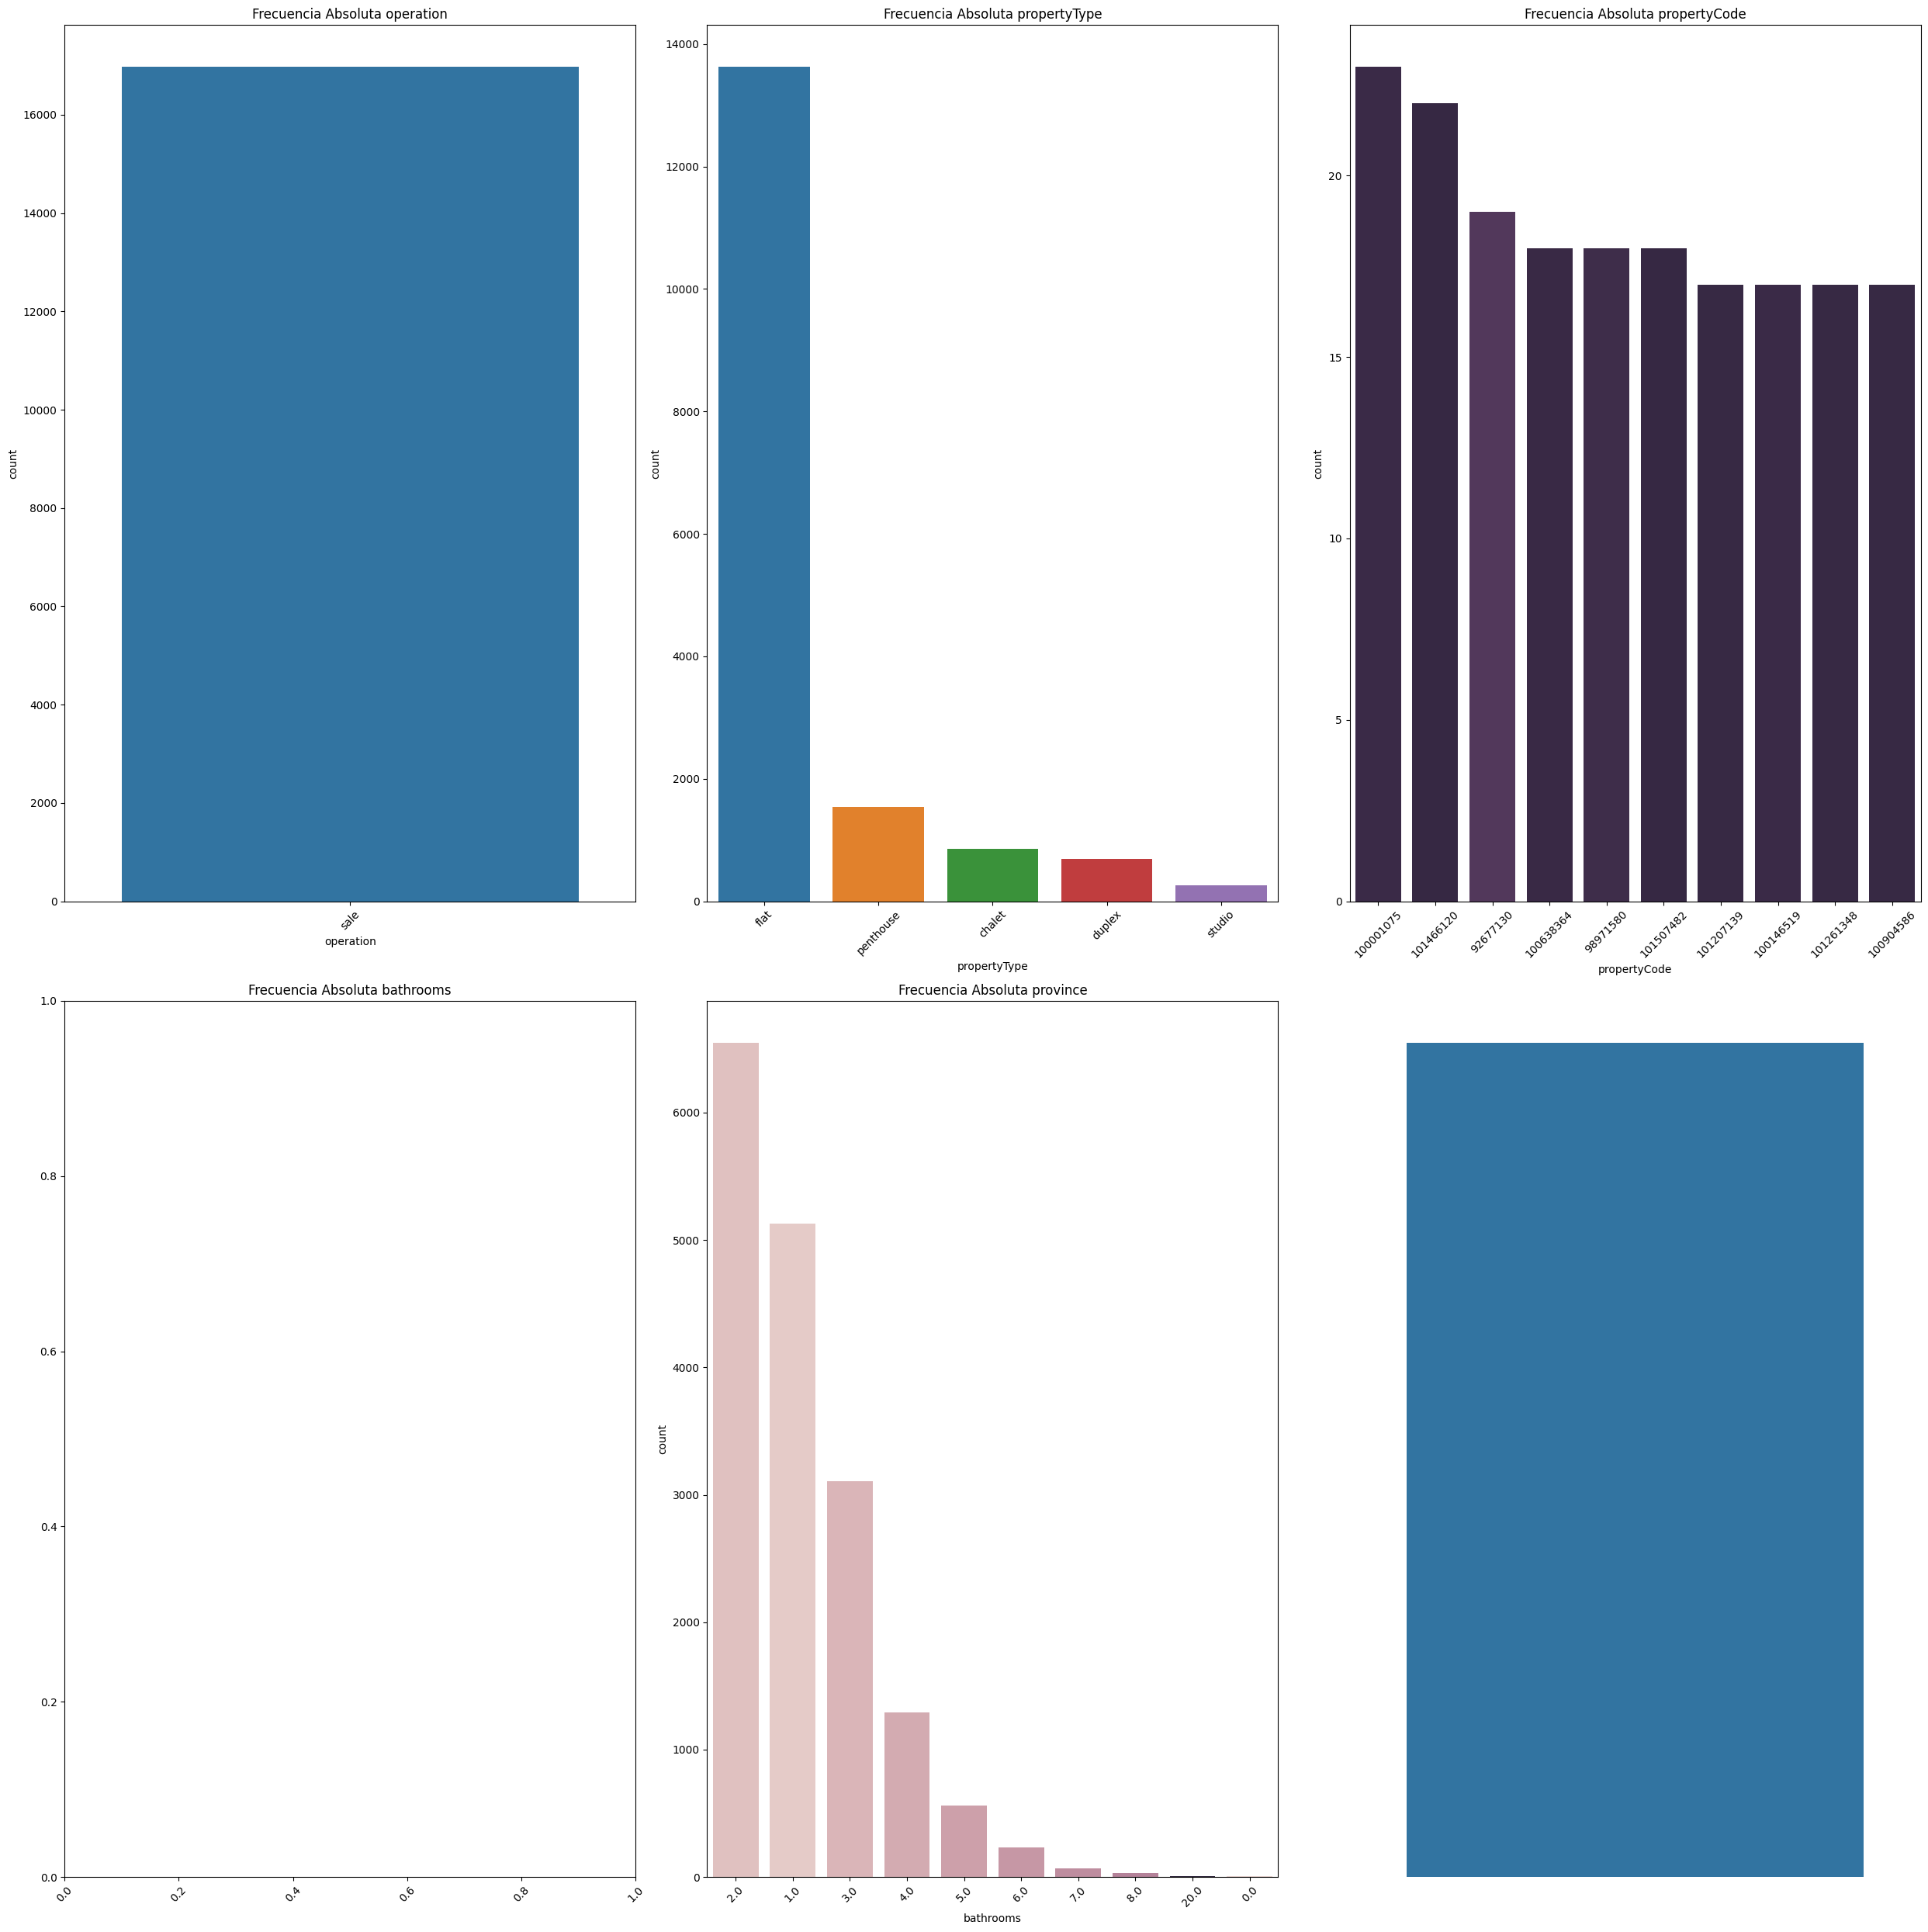

In [ ]:
# Utilizamos la frecuencia absoluta para visualizar las variables categoricas

# Crear figura con 5 subplots
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()
axs[5].axis('off')

# 1. operation
sns.countplot(
    x="operation",
    data=df_raw,
    hue="operation",
    order=df_raw["operation"].value_counts().index,
    ax=axs[0],
    legend=False
)
axs[0].set_title("Frecuencia Absoluta operation")
axs[0].tick_params(axis='x', rotation=45)
# 2. propertyType
sns.countplot(
    x="propertyType",
    data=df_raw,
    hue="propertyType",
    order=df_raw["propertyType"].value_counts().index,
    ax=axs[1],
    legend=False
)
axs[1].set_title("Frecuencia Absoluta propertyType")
axs[1].tick_params(axis='x', rotation=45)

# 3. propertyCode
sns.countplot(
    x="propertyCode",
    data=df_raw,
    hue="propertyCode",
    order=df_raw["propertyCode"].value_counts().index[:10],
    ax=axs[2],
    legend=False
)
axs[2].set_title("Frecuencia Absoluta propertyCode")
axs[2].tick_params(axis='x', rotation=45)



# 4. bathrooms
sns.countplot(
    x="bathrooms",
    data=df_raw,
    hue="bathrooms",
    order=df_raw["bathrooms"].value_counts().index[:10],
    ax=axs[4],
    legend=False
)
axs[3].set_title("Frecuencia Absoluta bathrooms")
axs[3].tick_params(axis='x', rotation=45)

# 5. province
sns.countplot(
    x="province",
    data=df_raw,
    hue="province",
    order=df_raw["province"].value_counts().index,
    ax=axs[5],
    legend=False
)
axs[4].set_title("Frecuencia Absoluta province")
axs[4].tick_params(axis='x', rotation=45)
# Ajuste final
plt.tight_layout()
plt.show()






# No entiendo porque genera graficas en blanco

#### Frecuencia Relativa

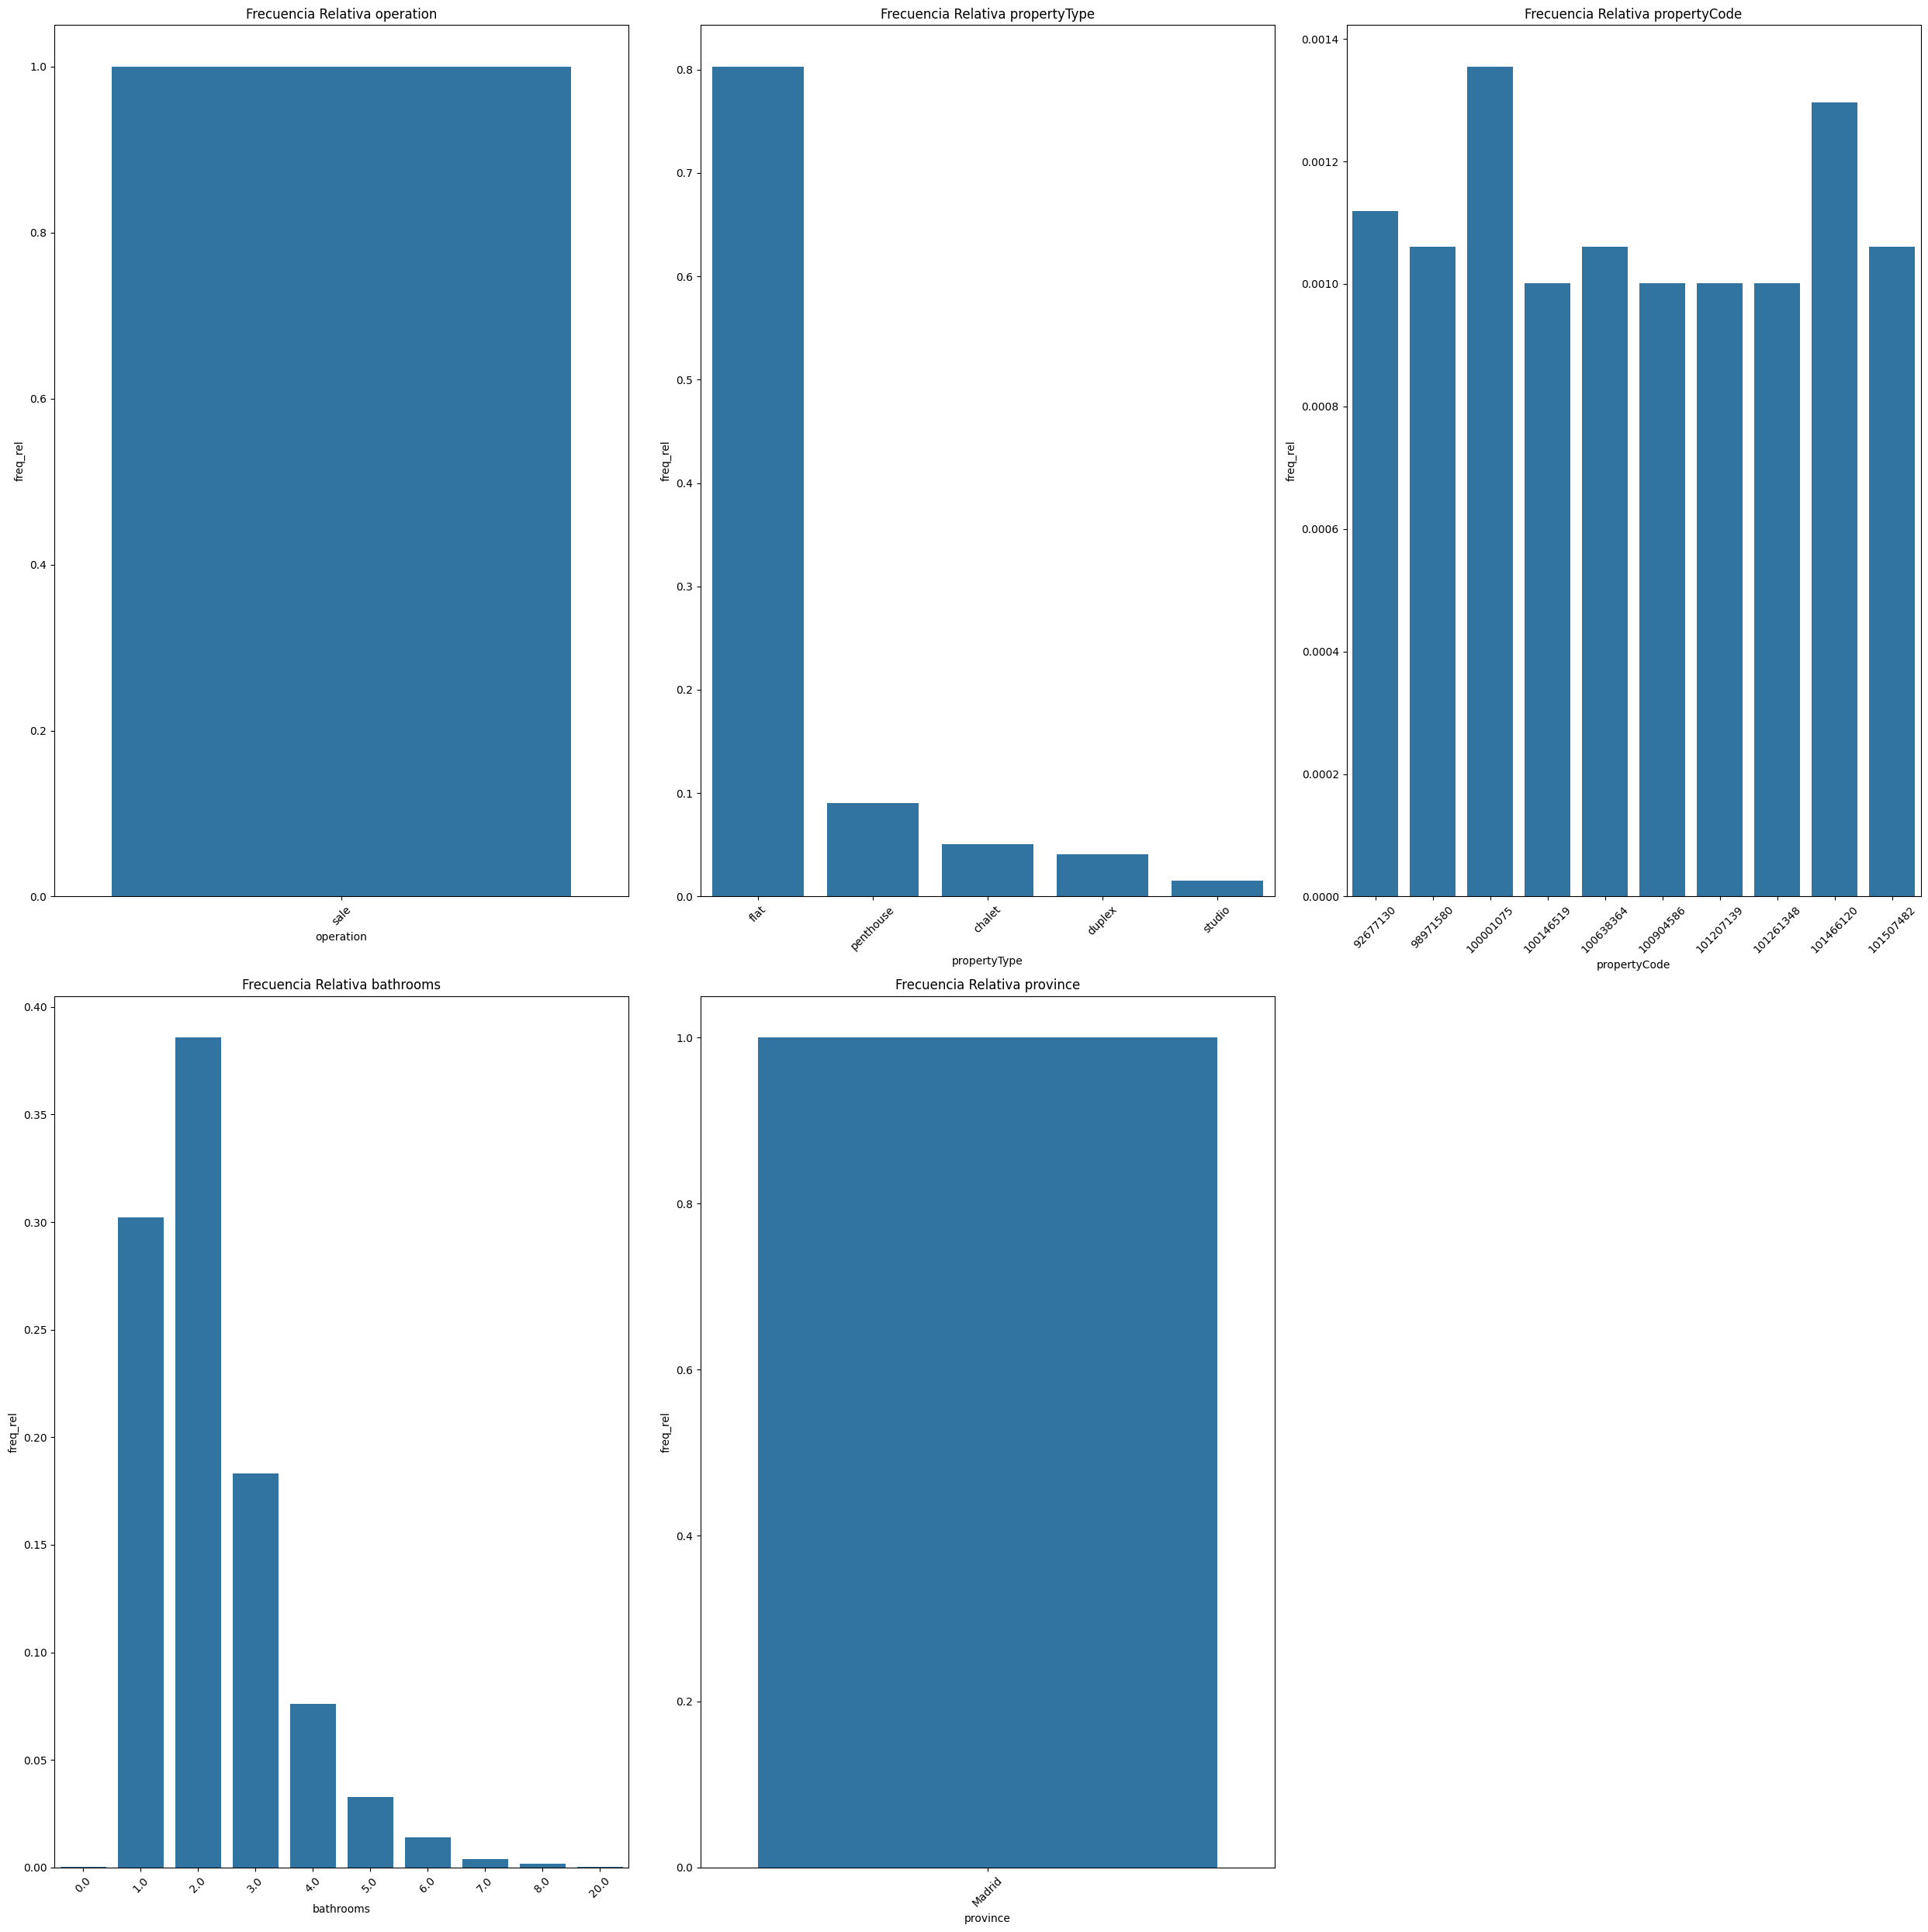

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()
axs[5].axis('off')

# 1. operation
freq_operation = (
    df_raw["operation"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_operation.columns = ["operation", "freq_rel"]

sns.barplot(
    data=freq_operation,
    x="operation",
    y="freq_rel",
    ax=axs[0]
)
axs[0].set_title("Frecuencia Relativa operation")
axs[0].tick_params(axis='x', rotation=45)

# 2. propertyType
freq_propertyType = (
    df_raw["propertyType"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_propertyType.columns = ["propertyType", "freq_rel"]

sns.barplot(
    data=freq_propertyType,
    x="propertyType",
    y="freq_rel",
    ax=axs[1]
)
axs[1].set_title("Frecuencia Relativa propertyType")
axs[1].tick_params(axis='x', rotation=45)

# 3. propertyCode (top 10)
freq_propertyCode = (
    df_raw["propertyCode"]
    .value_counts(normalize=True)
    .head(10)
    .reset_index()
)
freq_propertyCode.columns = ["propertyCode", "freq_rel"]

sns.barplot(
    data=freq_propertyCode,
    x="propertyCode",
    y="freq_rel",
    ax=axs[2]
)
axs[2].set_title("Frecuencia Relativa propertyCode")
axs[2].tick_params(axis='x', rotation=45)

# 4. bathrooms (top 10)
freq_bathrooms = (
    df_raw["bathrooms"]
    .value_counts(normalize=True)
    .head(10)
    .reset_index()
)
freq_bathrooms.columns = ["bathrooms", "freq_rel"]

sns.barplot(
    data=freq_bathrooms,
    x="bathrooms",
    y="freq_rel",
    ax=axs[3]
)
axs[3].set_title("Frecuencia Relativa bathrooms")
axs[3].tick_params(axis='x', rotation=45)

# 5. province
freq_province = (
    df_raw["province"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_province.columns = ["province", "freq_rel"]

sns.barplot(
    data=freq_province,
    x="province",
    y="freq_rel",
    ax=axs[4]
)
axs[4].set_title("Frecuencia Relativa province")
axs[4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Análisis Categóricas


**Operation :**
- En este apartado tratamos que tipo de operacion se ha llevado a cabo con los imuebles. En este todos son venta de propiedad

**PropertyType:**
- En este apartado comparamos que tio de viviendas son las mas demandadas y como vemos en el grafico se trara del tipo flat (apartamento)

**PropertyCode:**
-  Se trata del número de registro de los inmuebles

**Bathrooms:**
- Se categorizan las viviendas en función del número de baños que tienen, la mayoría disponen de 1

**Provice:**
- Como vemos en el gráfico de privincia todos los inmuebles están centrados en Madrid



### Columnas Sofía/ municipality-priceByArea

#### Frecuencia absoluta

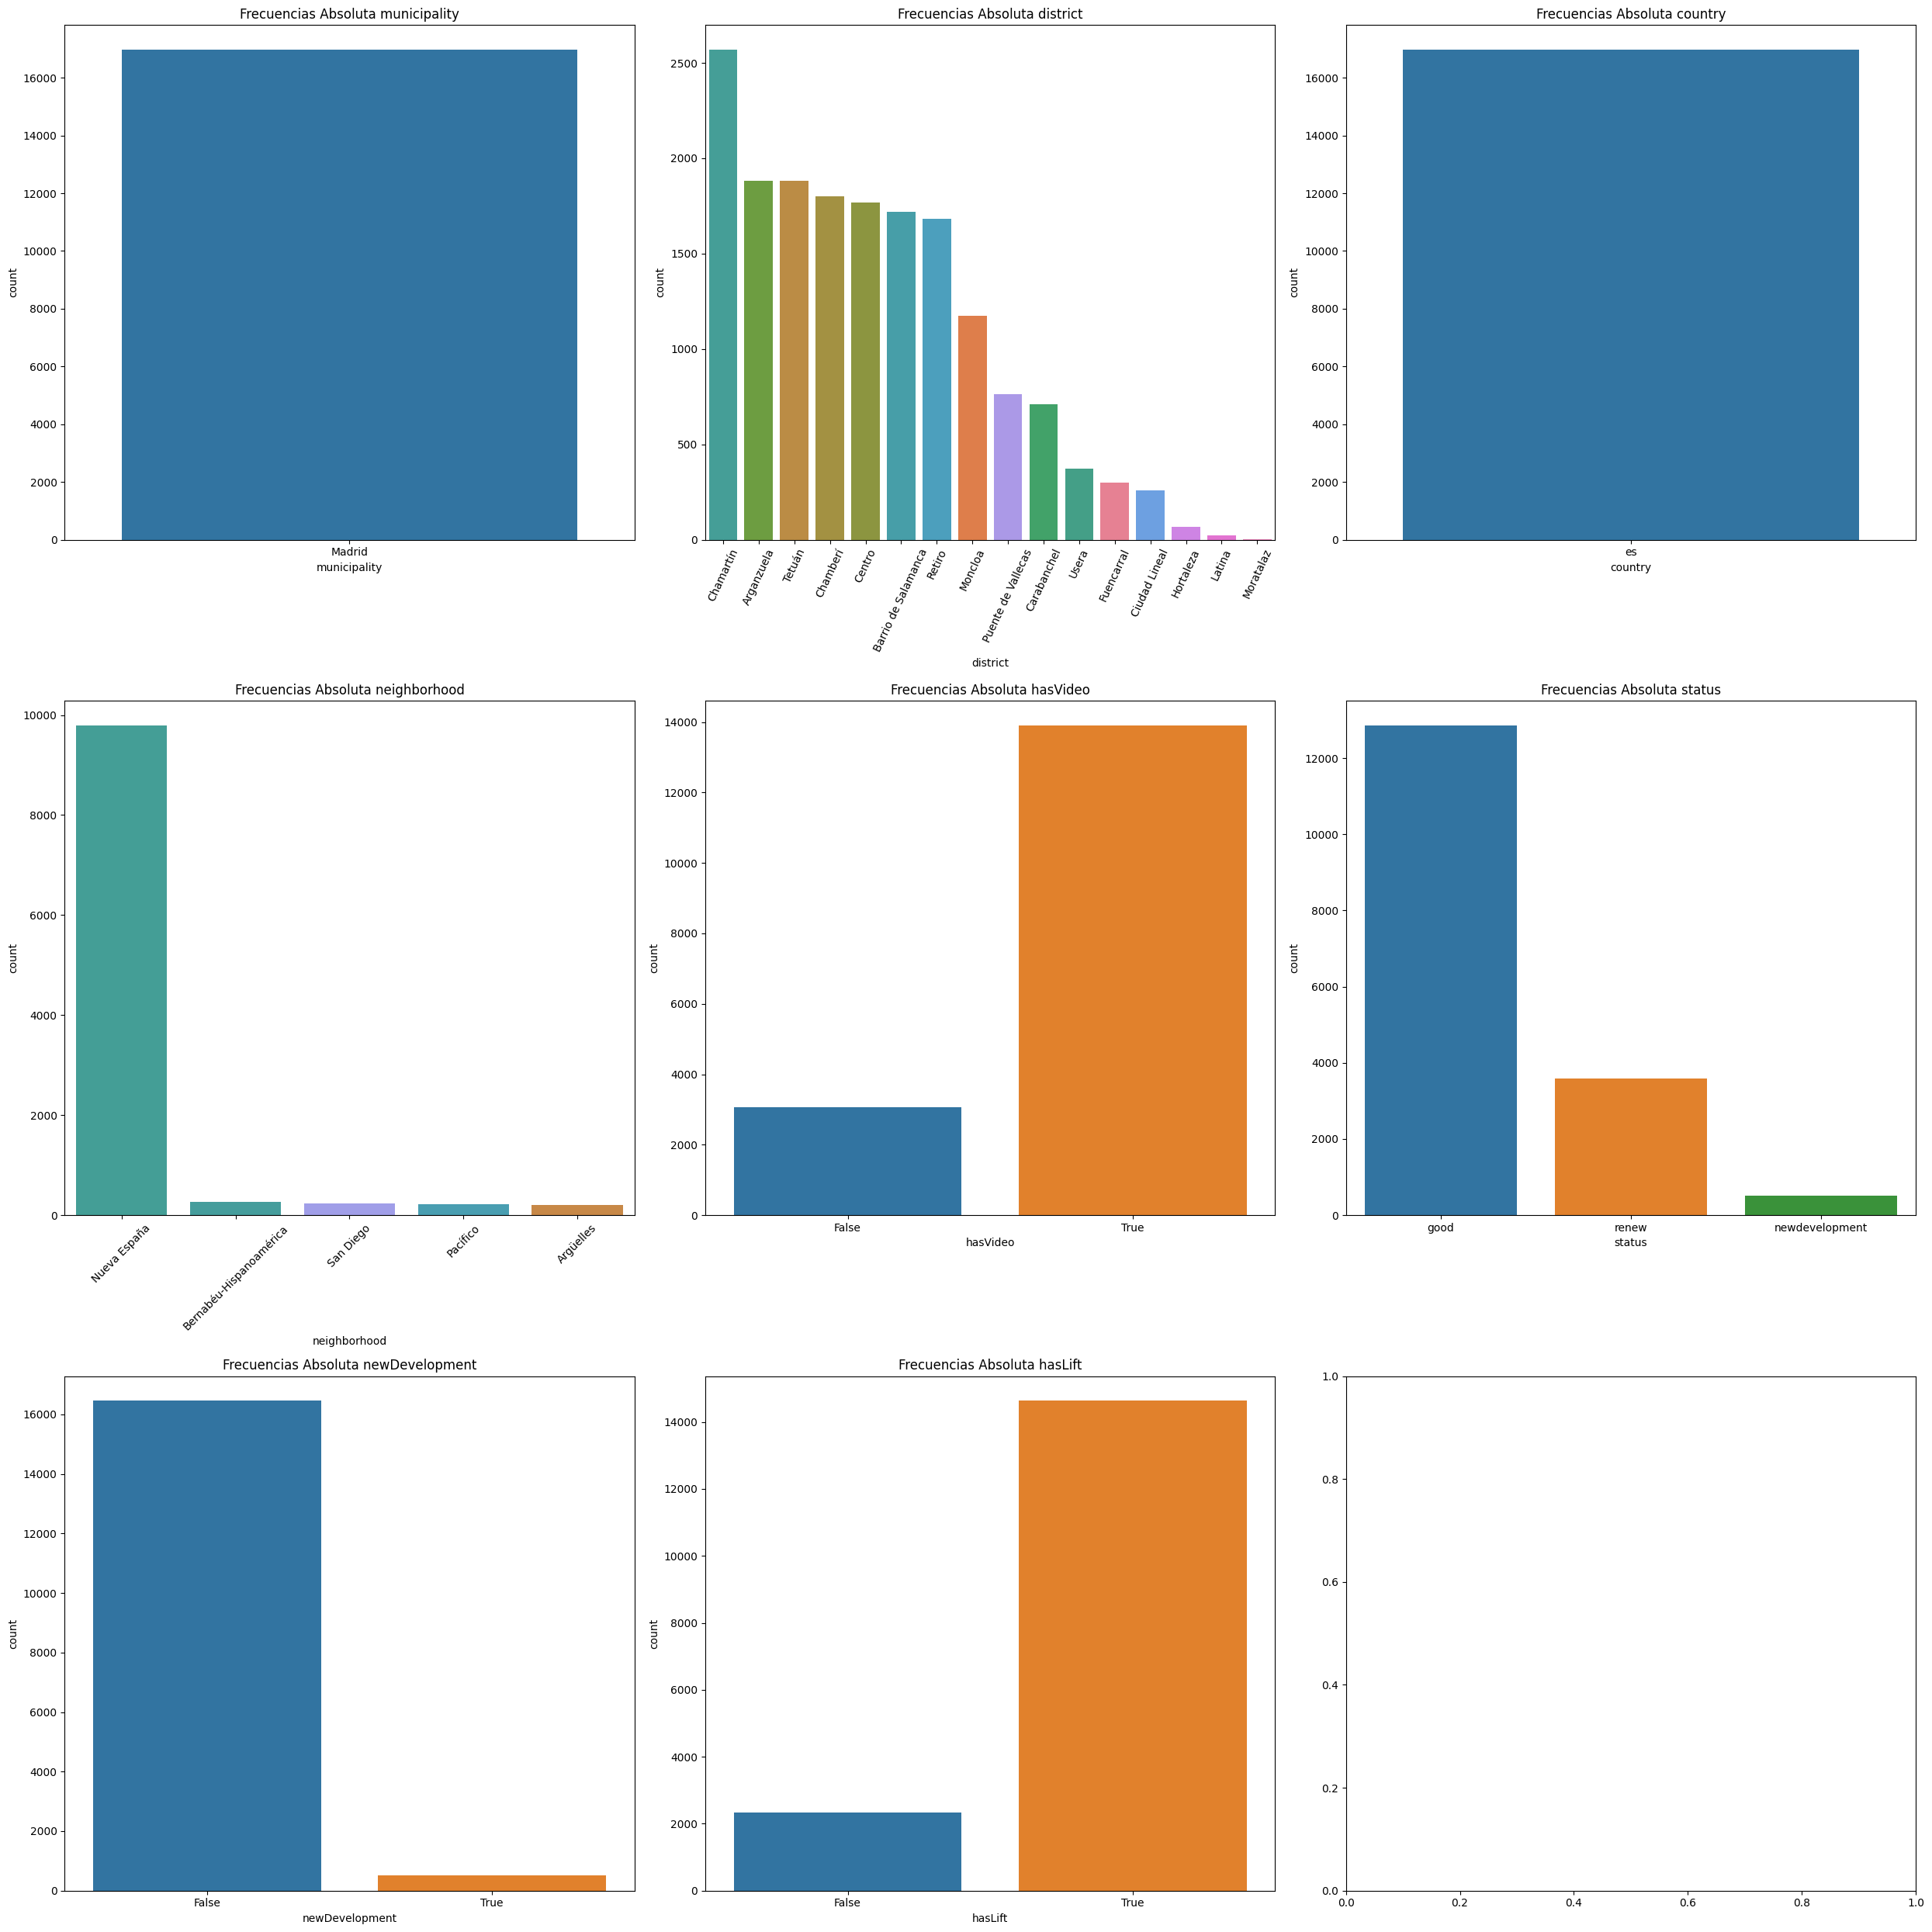

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
sns.countplot(x= "municipality", data= df_raw, hue= "municipality", ax=axs[0], legend=False)
axs[0].set_title("Frecuencias Absoluta municipality")

# Segunda figura
sns.countplot(x="district", data=df_raw, hue= "district",  order=df_raw["district"].value_counts().index, ax=axs[1], legend=False)
axs[1].set_title("Frecuencias Absoluta district")
axs[1].tick_params(axis='x', rotation=65)

# Tercera figura
sns.countplot(x="country", data=df_raw, hue= "country", ax=axs[2], legend=False)
axs[2].set_title("Frecuencias Absoluta country")

# Cuarta figura
sns.countplot(x="neighborhood", data=df_raw, hue= "neighborhood", ax=axs[3], order=df_raw["neighborhood"].value_counts().index[:5], legend=False)
axs[3].set_title("Frecuencias Absoluta neighborhood")
axs[3].tick_params(axis='x', rotation=45)

# Quinta figura
sns.countplot(x= "hasVideo", data= df_raw, hue= "hasVideo", ax= axs[4], legend= False)
axs[4].set_title("Frecuencias Absoluta hasVideo")

# Sexta figura
sns.countplot(x= "status", data= df_raw, hue= "status", ax= axs[5], legend= False)
axs[5].set_title("Frecuencias Absoluta status")

# Septima figura
sns.countplot(x= "newDevelopment", data= df_raw, hue= "newDevelopment", ax= axs[6], legend= False)
axs[6].set_title("Frecuencias Absoluta newDevelopment")

# Octava figura
sns.countplot(x= "hasLift", data= df_raw, hue= "hasLift", ax= axs[7], legend= False)
axs[7].set_title("Frecuencias Absoluta hasLift")

'''# Novena figura #Solucionar
sns.countplot(x="parkingSpace", data=df_raw, hue= "parkingSpace", ax=axs[8], order=df_raw["parkingSpace"].value_counts().index, legend=False)
axs[8].set_title("Frecuencias Absoluta parkingSpace")
axs[8].tick_params(axis='x', rotation=45)'''

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()



#### Frecuencia relativa

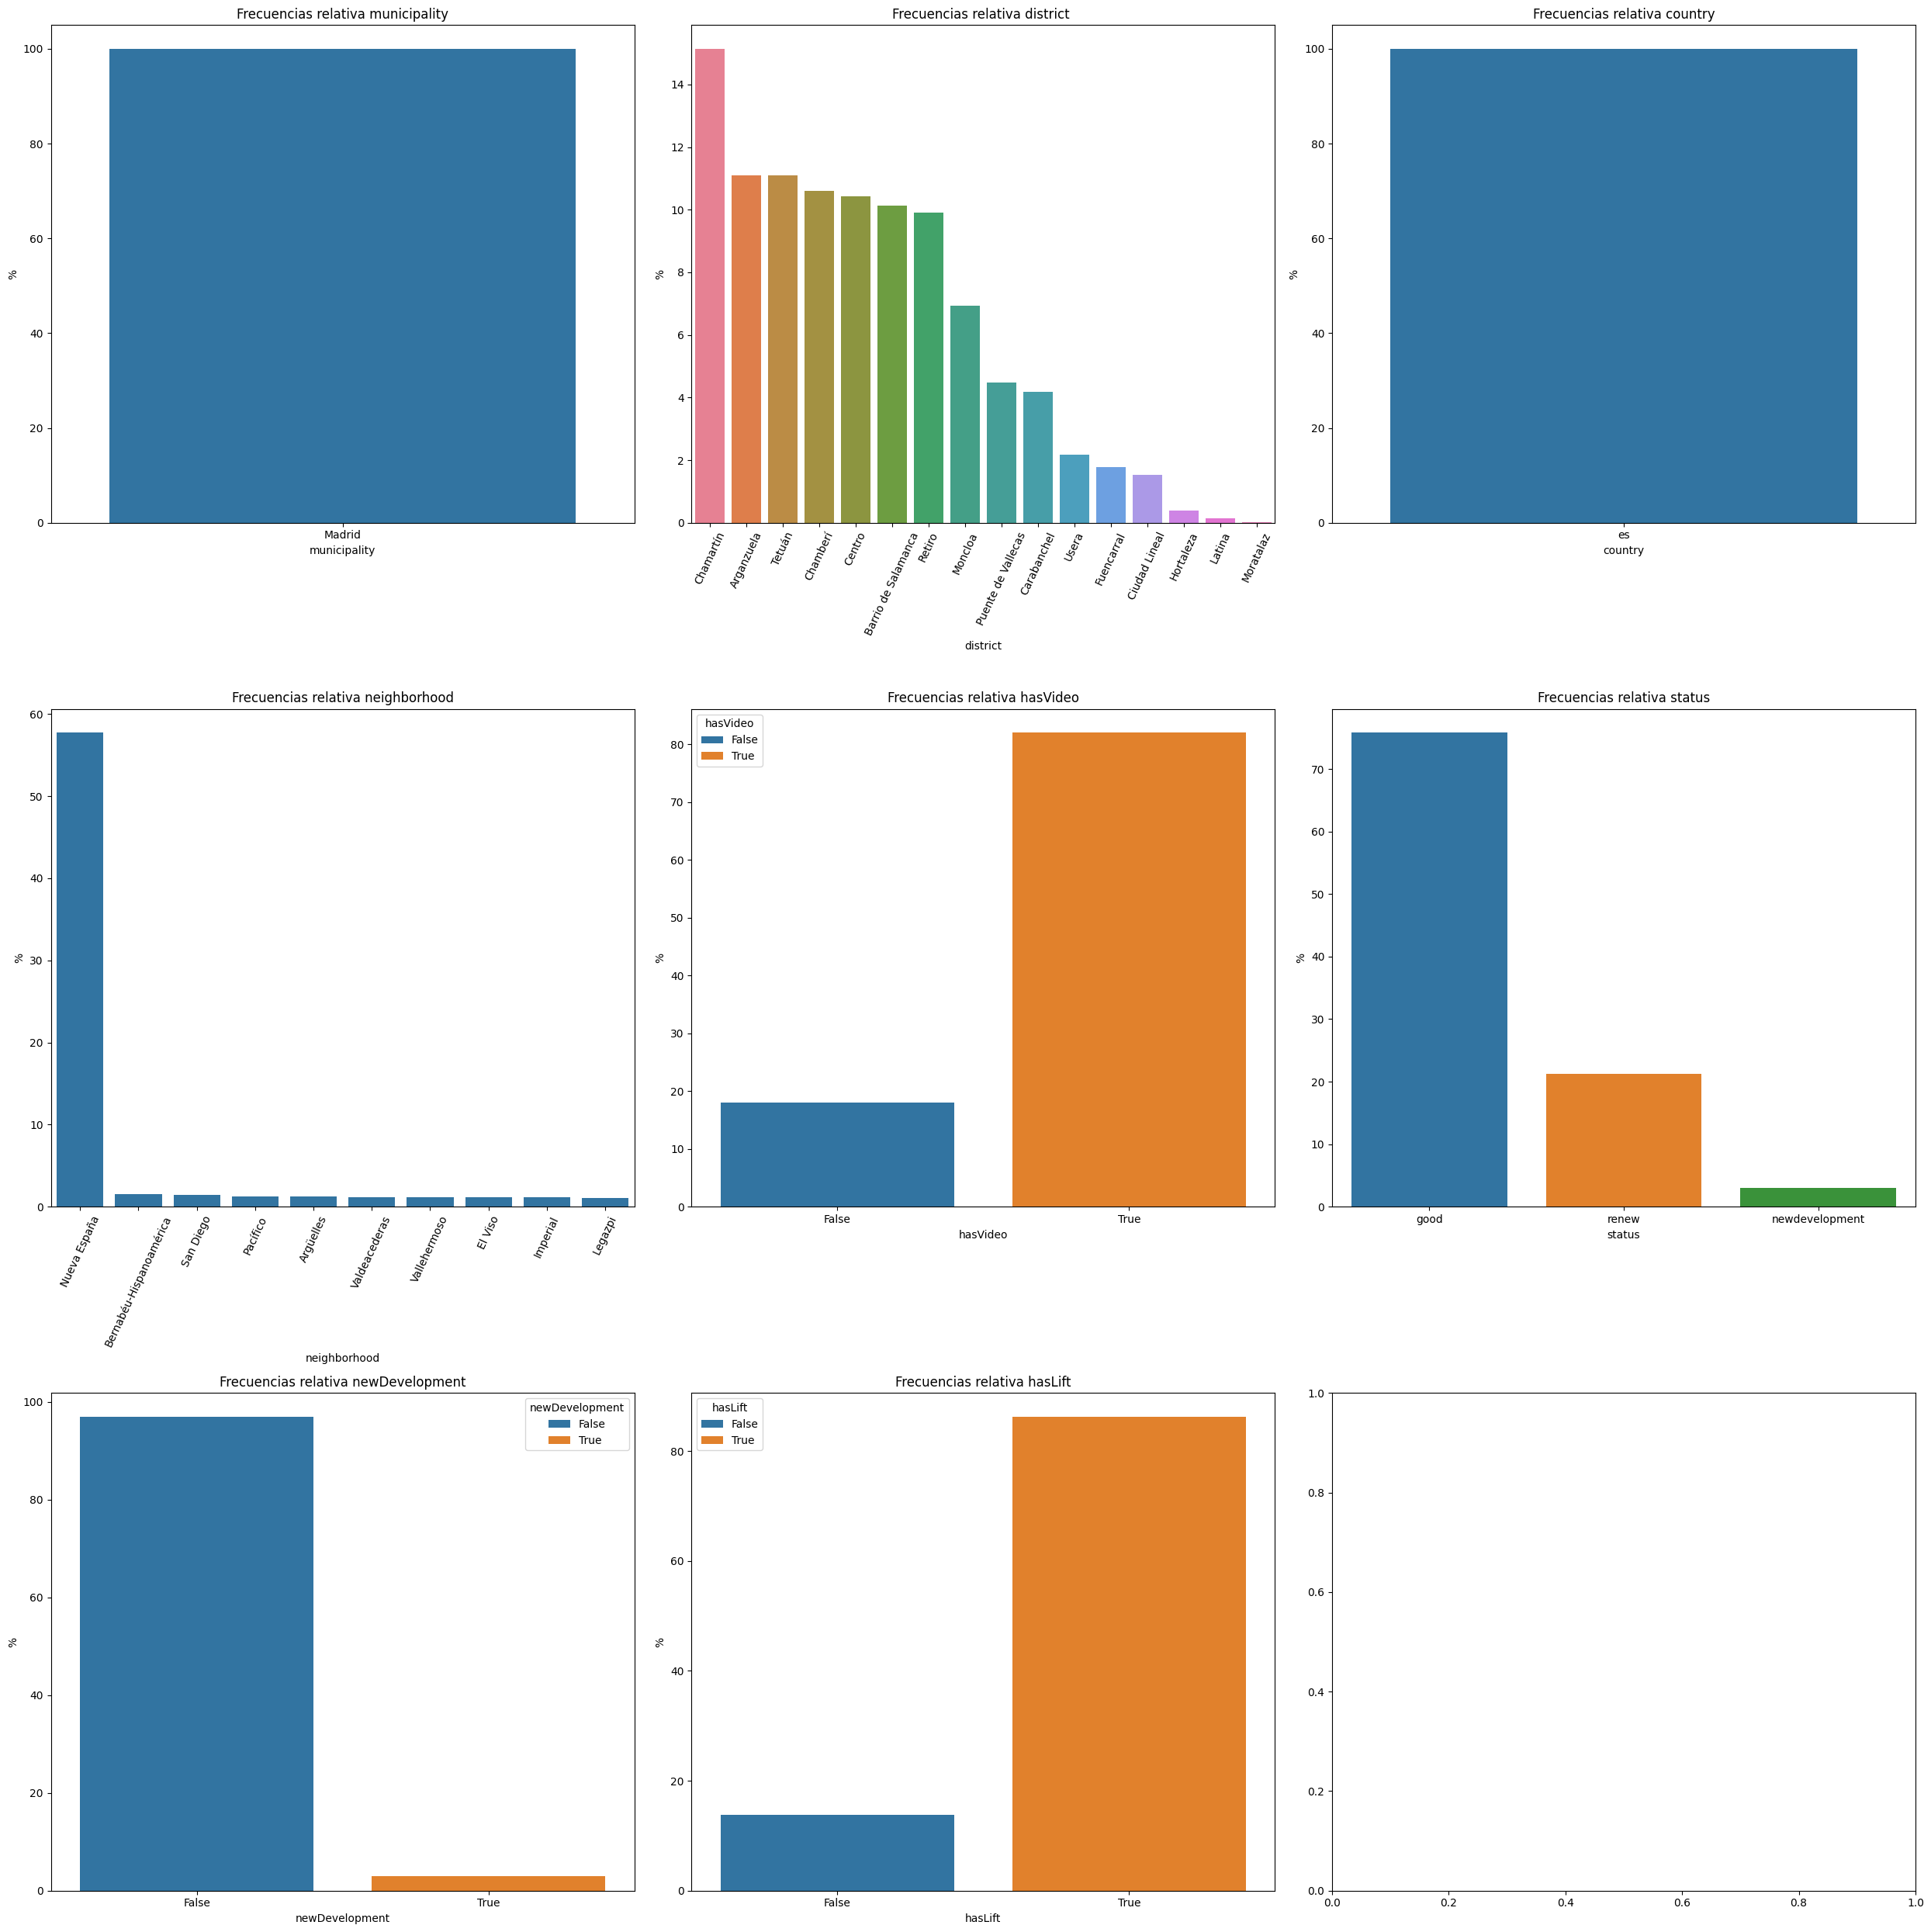

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
valores = df_raw.municipality.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index,  ax = axs[0])
axs[0].set_title("Frecuencias relativa municipality")
axs[0].set_ylabel("%")


# Segunda figura
valores = df_raw.district.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativa district ")
axs[1].set_ylabel("%")
axs[1].tick_params(axis='x', rotation=65)


# Tercera figura
valores = df_raw.country.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[2])
axs[2].set_title("Frecuencias relativa country")
axs[2].set_ylabel("%")

# Cuarta figura
valores = df_raw.neighborhood.value_counts(normalize = True) * 100
top_barrios = valores.nlargest(10)
sns.barplot(x=top_barrios.index, y=top_barrios.values, ax = axs[3])
axs[3].set_title("Frecuencias relativa neighborhood")
axs[3].set_ylabel("%")
axs[3].tick_params(axis='x', rotation=65)


# Quinta figura
valores = df_raw.hasVideo.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[4])
axs[4].set_title("Frecuencias relativa hasVideo")
axs[4].set_ylabel("%")

# Sexta figura
valores = df_raw.status.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[5])
axs[5].set_title("Frecuencias relativa status")
axs[5].set_ylabel("%")

# Septima figura
valores = df_raw.newDevelopment.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[6])
axs[6].set_title("Frecuencias relativa newDevelopment")
axs[6].set_ylabel("%")

# Octava figura
valores = df_raw.hasLift.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[7])
axs[7].set_title("Frecuencias relativa hasLift")
axs[7].set_ylabel("%")

# Novena figura #Solucionar
'''
valores = df_raw.parkingSpace.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[8])
axs[8].set_title("Frecuencias relativa parkingSpace")
axs[8].set_ylabel("%")
axs[8].tick_params(axis='x', rotation=65)
'''

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

### Análisis Categóricas

**Municipality y Country:**
- Ninguna de ellas aporta variabilidad por lo tanto se pueden eliminar o mantener para el contexto.

**District:**
- Presenta varias categorías con frecuencias muy distintas. El distrito con mayor número de propiedades es Chamartín (15%), mientras que otros tienen una número mucho menor. Esta variabilidad es interesante ya que se podría segmentar por zona y ver las diferencias de precio, habitaciones, estado del inmueble, etc.

**Neighborhood:**
- La variable neighborhood está muy desbalanceada: casi el 70% de los registros pertenecen a Nueva España y el resto de barrios tienen frecuencias muy bajas. Para que los gráficos sean más legibles y se puedan comparar mejor los barrios, sería mejor agrupar los menos frecuentes en una categoría llamada “Otros”, de esta forma no se perderá información importante. 

**HasVideo:**
- La variable hasVideo está desbalanceda True representa aproximadamente el 85% y False el 15%. Esto podría influir en el intéres del comprador ya que la mayoría de los anuncios incluyen vídeo. Sería interesante ver su relación con el precio.

**Status:**
- La variable status tiene tres categorias: good reprsenta el 75%, renew el 20% y newdevelopment aproximadamente el 3%. Se podría analizar su relación con la variable directora.

**NewDevelopment:**
- La mayoría de los inmuebles no son de obra nueva (95%). Esta variable puede ser útil para comparar los precios entre obra nueva y usada.

**HasLift:**
- La mayoría de los inmuebles no tienen ascensor (85%), analizar la relacón que pueda tener con la variable directora.



#### Numéricas

In [ ]:
numéricas.describe()

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,ex,parkingSpacePrice
count,1.697600e+04,7445.000000,1.697600e+04,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,2393.000000,738.000000
mean,1.012360e+08,34.536467,9.088270e+05,148.357564,2.986923,2.222432,40.429523,-3.693213,5719.913172,598.073966,32743.021680
std,4.972829e+06,14.096578,9.178839e+05,106.105628,1.430184,1.238082,0.026237,0.017452,2469.852379,345.670428,17910.713089
min,2.809747e+07,0.000000,6.000000e+04,21.000000,0.000000,0.000000,40.381682,-3.725622,911.000000,0.000000,150.000000
25%,1.007357e+08,26.000000,3.590000e+05,80.000000,2.000000,1.000000,40.406951,-3.708135,4096.000000,299.000000,20000.000000
50%,1.018816e+08,33.000000,6.100000e+05,118.000000,3.000000,2.000000,40.429536,-3.693824,5187.000000,598.000000,29000.000000
75%,1.030968e+08,42.000000,1.129000e+06,182.000000,4.000000,3.000000,40.452797,-3.677042,6818.000000,897.000000,40000.000000
max,1.046568e+08,108.000000,1.180000e+07,995.000000,18.000000,20.000000,40.477295,-3.661150,18689.000000,1197.000000,120000.000000


##### IQR

In [ ]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)
for col in numéricas.columns:
    print(col, get_IQR(df_raw, col))

propertyCode 2361113.0
numPhotos 0.0
price 770000.0
size 102.0
rooms 2.0
bathrooms 2.0
latitude 0.04584599999999739
longitude 0.031092974999999967
priceByArea 2722.0
ex 0.0
parkingSpacePrice 0.0


##### Rangos

In [ ]:
numéricas.describe().loc["max"] - numéricas.describe().loc["min"]

propertyCode         7.655931e+07
numPhotos            1.080000e+02
price                1.174000e+07
size                 9.740000e+02
rooms                1.800000e+01
bathrooms            2.000000e+01
latitude             9.561330e-02
longitude            6.447250e-02
priceByArea          1.777800e+04
ex                   1.197000e+03
parkingSpacePrice    1.198500e+05
dtype: float64

In [ ]:
# IQR (donde está el 50% de las casas "normales") con el Rango (la distancia total entre el valor más bajo y el más alto).

#### IQR/ RANGO

**Numphotos:**
- IQR: 0.0 | Rango: 108.0
- Al ser el IQR de 0.0, la gran mayoría de los anuncios tienen la misma cantidad de fotos, mientras que el rango indica que solo unos pocos anuncios tienen muchas imágenes.

**Price:**
- IQR: 785,000 | Rango: 11,740,000
- Existe una gran diferencia entre el rango y el IQR. Mientras que la mayoría de las casas se mueven en un margen de 785 mil euros, el total llega hasta los 11 millones
- Esto explica que el promedio está muy inflado por unas pocas propiedades de lujo que no representan a la mayoría

**Size:**
- IQR: 103.0 | Rango: 974.0
- El rango es casi 10 veces más grande que el IQR
- Casi todas las viviendas tienen un tamaño parecido de 100 metros, pero hay un par de propiedades muy grandes que hacen que el rango se vea mayor

**Rooms/ Bathrooms:**
- IQR: 2.0 | Rango: 18.0/20.0
- El rango es desproporcionado respecto al IQR
- Casi todos los inmuebles tienen 2 habitaciones/baños. Los valores cercanos a 18/20 son casos aislados o errores de datos

**Latitude/Longitude:**
- IQR: 0.04 / 0.03 | Rango: 0.09 / 0.06
- Dispersión baja
- Los datos están geográficamente muy compactos. El IQR representa una gran parte del rango, lo que indica que no hay outliers significativos

**PriceByArea:**
- IQR: 2,708.0 | Rango: 17,778.0
- Dispersión alta
- Aunque la mayoría de los precios por metro están cerca unos de otros, hay zonas específicas donde el suelo es muchísimo más caro de lo normal





##### CV

In [ ]:
# Obtenemos sus CV con una función
def get_CV(df_raw, columna):
    # Si columna es un DataFrame lo convierte en una lista de nombres
    if isinstance(columna, pd.DataFrame):
        columna = columna.columns.tolist()
    
    desc = df_raw[columna].describe().T
    return desc["std"] / desc["mean"] * 100

get_CV(df_raw, numéricas)

#Un CV menor al 15% suele considerarse como una baja variabilidad.
#Un CV entre 15% y 30% indica una variabilidad moderada.
#Un CV mayor al 30% a menudo se considera como una alta variabilidad.


propertyCode           4.912113
numPhotos             27.029255
price                100.996550
size                  71.520201
rooms                 47.881510
bathrooms             55.708460
latitude               0.064897
longitude             -0.472529
priceByArea           43.179893
ex                    21.696168
parkingSpacePrice     11.397851
dtype: float64

#### CV

**NumPhotos: 23.22%**  
- Dispersión moderada
- Los datos no son homogeneos, pero están relativamente concentrados alrededor de la media

**Price: 100.77%**  
- Dispersión muy alta (más del 100%)
- Significa que la desviación estándar es mayor que la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes  

**Size: 71.48%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Rooms: 46.93%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Bathrooms: 55.13%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Latitude:  0.06%**
- Dispersión baja (menor al 15%)
- Indica datos muy homogéneos
- La media define muy bien a todo el grupo

**Longitude:  0.46%**
- Dispersión baja (menor al 15%)
- Indica datos muy homogéneos
- La media define muy bien a todo el grupo

**PriceByArea: 42.68%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes


##### Distribución: Histrogramas, Funciones Densidad (KDE)

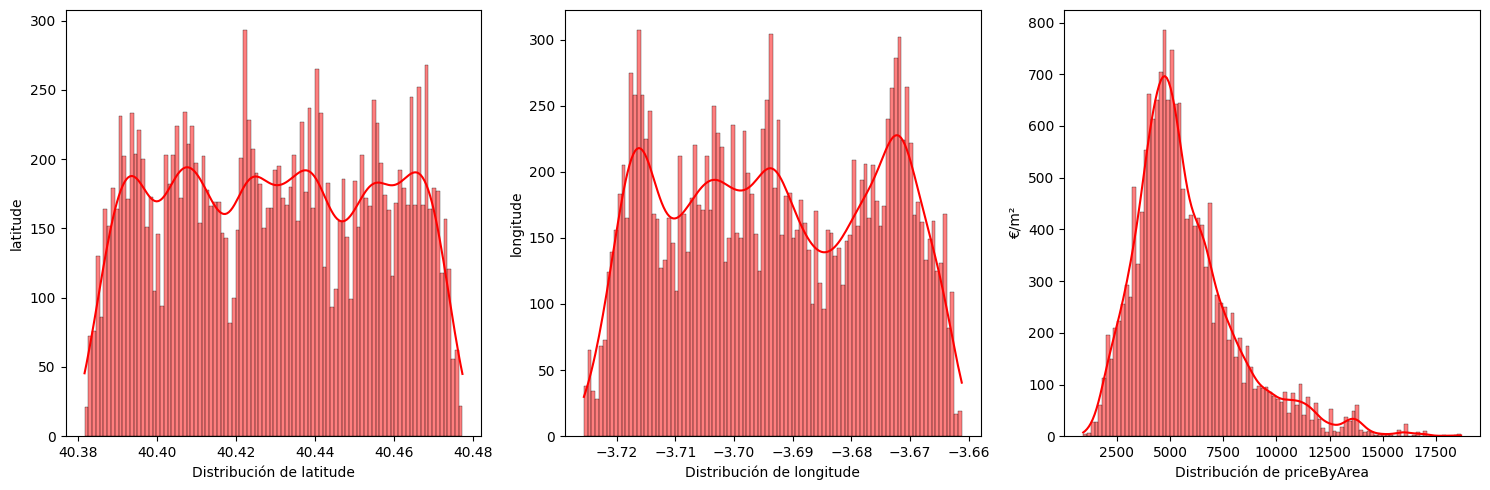

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.histplot(df_raw["latitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[0]) 
axs[0].set_xlabel("Distribución de latitude")
axs[0].set_ylabel("latitude")

# Segunda figura
sns.histplot(df_raw["longitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[1]) 
axs[1].set_xlabel("Distribución de longitude")
axs[1].set_ylabel("longitude")

# Tercera figura
sns.histplot(df_raw["priceByArea"],
             kde=True,
             color='r',
             bins=100, ax = axs[2]) 
axs[2].set_xlabel("Distribución de priceByArea")
axs[2].set_ylabel("€/m²")

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

##### Boxplot

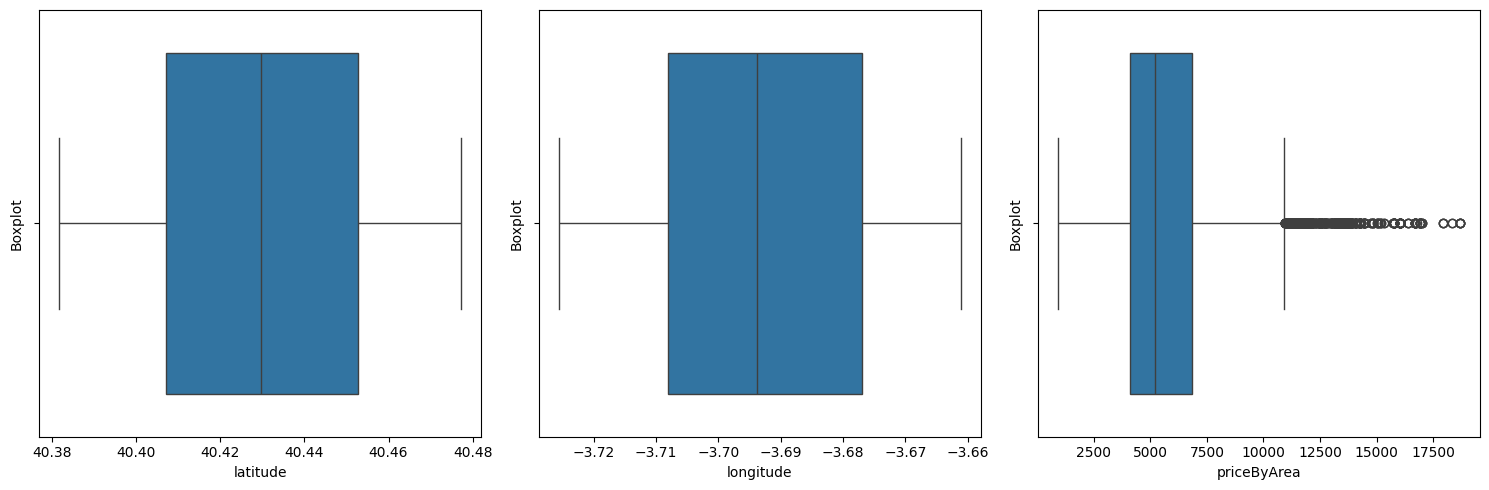

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.boxplot(x = "latitude", data = df_raw, ax= axs[0])
axs[0].set_xlabel("latitude")
axs[0].set_ylabel("Boxplot")

# Segunda figura
sns.boxplot(x = "longitude", data = df_raw, ax= axs[1])
axs[1].set_xlabel("longitude")
axs[1].set_ylabel("Boxplot")

# Tercera figura
sns.boxplot(x = "priceByArea", data = df_raw, ax= axs[2])
axs[2].set_xlabel("priceByArea")
axs[2].set_ylabel("Boxplot")

plt.tight_layout()
plt.show()

#### Distribución y Boxplots

**Latitude y Longitude:**
- Al observar los histogramas de latitud y longitud, se pueden ver varios picos muy marcados. Me gustaría saber si el pico más alto de oferta (donde hay más propiedades) coincide con los precios más bajos o si, por el contrario los puntos más densos son también los más caros.

**PriceByArea:**
- Como podemos observar priceByArea tiene una cola muy larga hacia la derecha, Se podría generar un nuevo histograma de priceByArea filtrando los valores más altos (outliers). Esto nos permitirá ver con mucha más claridad si la mayoría de los precios se agrupan en una campana normal o si hay otros subgrupos ocultos.

### Análisis Bivariante